# ENGETO PROJECT
## EDINBURGH BIKE-SHARING

### EN
Assignment:

In Edinburgh, as in other cities, there is a "bike sharing" system - there are bike stations in the city, one can borrow some and then return it to another station. The problem is that in some stations the bikes are accumulating too much and in others they are missing. The bicycle operator, Just Eat Cycles, has commissioned a project to make the system more efficient. The output of the project is open: it can be a supply plan carrying bicycles between stations or a proposal for a new pricing.

As a data analyst, you are part of the team working on the project. Your task is to process relevant data and derive from it information useful for the rest of the team. You have data on all borrowings (in the ENGETO database in the edinburgh_bikes table). Perform standard descriptive data statistics. Also, analyze at least the following information:

- identify active and inactive stations
- identify the most frequently used stations
- identify stations where bikes are accumulating too much and stations where they are potentially missing
- calculate the distances between the individual stations
- how long does one borrowing last? Find outliers, display the histogram

Demand analysis:

- visualize the development of the demand for the bicycle rental over time
- identify the causes of fluctuations in demand
- find out the influence of the weather on the demand for bicycles (weather data in Edinburgh are in the table edinburgh_weather)
- do people rent bikes more on weekends than during the working week?

### CZ
Zadání:

V Edinburghu, stejně jako v dalších městech, funguje systém "bike sharing" - ve městě jsou stanice s koly, člověk si může nějaké půjčit a potom ho vrátit v nějaké další stanici. Problém je, že v některých stanicích se kola pravidelně hromadí a jinde naopak chybí. Provozovatel kol, firma Just Eat Cycles, zadala projekt, jehož cílem je systém zefektivnit. Výstup projektu je otevřený: může to být plán dodávek převážejících kola mezi stanicemi nebo návrh nové cenotvorby.

Coby datový analytik jste součástí týmu, který na projektu pracuje. Vaším úkolem je zpracovat relevantní data a zjistit z nich informace užitečné pro zbytek týmu. Máte k dispozici data o všech výpůjčkách (na ENGETO databázi v tabulce edinburgh_bikes). Proveďte standardní deskriptivní statistiku dat. Také zjistěte minimálně následující informace:

- identifikujte aktivní a neaktivní stanice
- identifikujte nejfrekventovanější stanice
- identifikujte stanice, na kterých se kola hromadí a stanice, kde potenciálně chybí
- spočítejte vzdálenosti mezi jednotlivými stanicemi
- jak dlouho trvá jedna výpůjčka? Najděte odlehlé hodnoty, zobrazte histogram

Analýza poptávky:

- zobrazte vývoj poptávky po půjčování kol v čase
- identifikujte příčiny výkyvů poptávky
- zjistěte vliv počasí na poptávku po kolech (údaje o počasí v Edinburghu jsou v tabulce edinburgh_weather)
- půjčují si lidé kola více o víkendu než během pracovního týdne?

In [274]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import math

In [275]:
# read the bikes dataset and print the last 10 rows
bikes_initial = pd.read_csv('./datasets/edinburgh_bikes_csv.csv')
bikes_initial.tail(10)

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
340976,19369,2020-10-30 22:55:34,2020-10-30 23:04:23,528,1821,Drumsheugh Place,Corner with Drumsheugh Gardens,55.951594,-3.212354,1730,East London Street,Outside St Mary's Primary School,55.959954,-3.187198
340977,19370,2020-10-30 23:03:00,2020-10-30 23:07:21,260,1052,Surgeons Hall,East side of Nicolson Street,55.946643,-3.185475,265,Meadows East,Between Melville Terrace and Sciennes,55.939809,-3.182739
340978,19371,2020-10-30 23:14:21,2020-10-30 23:44:49,1827,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101
340979,19372,2020-10-30 23:15:27,2020-10-30 23:45:11,1784,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101
340980,19373,2020-10-30 23:19:31,2020-10-30 23:31:18,706,265,Meadows East,Between Melville Terrace and Sciennes,55.939809,-3.182739,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750
340981,19374,2020-10-30 23:27:35,2020-10-30 23:38:40,665,1051,Warrender Park Road,On corner with Spottiswoode Street,55.938369,-3.198033,1051,Warrender Park Road,On corner with Spottiswoode Street,55.938369,-3.198033
340982,19375,2020-10-30 23:33:50,2020-10-30 23:40:02,372,1798,Chambers Street,Outside National Museum,55.947600,-3.188920,1814,Abbeyhill,Near Abbey Mount,55.955248,-3.172216
340983,19376,2020-10-30 23:38:57,2020-10-30 23:43:33,275,1028,Hunter Square,In Hunter Square next to Tron Kirk,55.949798,-3.187795,1019,Grassmarket,West end of Grassmarket,55.947097,-3.197246
340984,19377,2020-10-30 23:41:26,2020-10-30 23:50:44,557,358,Leith Walk,Leith Walk opposite Dalmeny Street,55.965040,-3.176686,259,St Andrew Square,North East corner,55.954906,-3.192444
340985,19378,2020-10-30 23:51:25,2020-10-30 23:58:40,435,1730,East London Street,Outside St Mary's Primary School,55.959954,-3.187198,258,Stockbridge,Hamilton Place by Dean Bank Lane,55.958566,-3.208070


In [276]:
# read the weather dataset and print the first ten rows
weather_initial = pd.read_csv('./datasets/edinburgh_weather_csv.csv')
weather_initial.head(10)

,time,temp,feels,wind,gust,rain,humidity,cloud,pressure,vis,date
0,00:00,11 °c,11 °c,9 km/h from S,19 km/h,0.0 mm,79%,13%,1020 mb,Excellent,2018-09-01
1,03:00,13 °c,12 °c,11 km/h from SSW,19 km/h,0.0 mm,76%,96%,1020 mb,Excellent,2018-09-01
2,06:00,14 °c,13 °c,11 km/h from SSW,19 km/h,0.0 mm,84%,100%,1020 mb,Excellent,2018-09-01
3,09:00,14 °c,13 °c,14 km/h from SSW,23 km/h,0.1 mm,88%,78%,1021 mb,Excellent,2018-09-01
4,12:00,16 °c,16 °c,15 km/h from SSW,22 km/h,0.0 mm,87%,87%,1021 mb,Excellent,2018-09-01
5,15:00,17 °c,17 °c,14 km/h from SW,21 km/h,0.0 mm,83%,97%,1021 mb,Excellent,2018-09-01
6,18:00,16 °c,16 °c,12 km/h from SW,19 km/h,0.0 mm,88%,98%,1022 mb,Excellent,2018-09-01
7,21:00,14 °c,14 °c,11 km/h from SSW,19 km/h,0.0 mm,94%,52%,1022 mb,Excellent,2018-09-01
8,00:00,13 °c,13 °c,10 km/h from SSW,19 km/h,0.0 mm,95%,31%,1022 mb,Poor,2018-09-02
9,03:00,13 °c,13 °c,8 km/h from SSW,15 km/h,0.0 mm,96%,52%,1020 mb,Poor,2018-09-02


### 1. Descriptive Statistics and Data Wrangling

In [277]:
# print the overview information
bikes_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340986 entries, 0 to 340985
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      340986 non-null  int64  
 1   started_at                 340986 non-null  object 
 2   ended_at                   340986 non-null  object 
 3   duration                   340986 non-null  int64  
 4   start_station_id           340986 non-null  int64  
 5   start_station_name         340986 non-null  object 
 6   start_station_description  338142 non-null  object 
 7   start_station_latitude     340986 non-null  float64
 8   start_station_longitude    340986 non-null  float64
 9   end_station_id             340986 non-null  int64  
 10  end_station_name           340986 non-null  object 
 11  end_station_description    337891 non-null  object 
 12  end_station_latitude       340986 non-null  float64
 13  end_station_longitude      34

... missing values only in start_station_descritption and end_station_description, but those columns are irrelevant for the upcoming analysis

In [278]:
# statistical description
bikes_initial.describe().round(2)

,index,duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude
count,340986.00,340986.00,340986.00,340986.00,340986.00,340986.00,340986.00,340986.00
mean,9383.82,2061.25,873.60,55.95,-3.20,912.86,55.95,-3.20
std,7516.83,8703.69,657.83,0.01,0.04,664.57,0.02,0.04
min,0.00,61.00,171.00,55.91,-3.41,171.00,53.40,-3.41
25%,3320.00,620.00,259.00,55.94,-3.21,262.00,55.94,-3.21
50%,7433.00,1147.00,862.00,55.95,-3.19,880.00,55.95,-3.19
75%,13523.00,2512.00,1728.00,55.96,-3.18,1728.00,55.96,-3.18
max,29550.00,1373043.00,2268.00,55.99,-3.06,2268.00,55.99,-2.99


In [279]:
# check the dtypes
bikes_initial.dtypes

index                          int64
started_at                    object
ended_at                      object
duration                       int64
start_station_id               int64
start_station_name            object
start_station_description     object
start_station_latitude       float64
start_station_longitude      float64
end_station_id                 int64
end_station_name              object
end_station_description       object
end_station_latitude         float64
end_station_longitude        float64
dtype: object

In [280]:
# convert started_at and ended_at columns to datetime
bikes_initial['started_at'] = pd.to_datetime(bikes_initial['started_at'])
bikes_initial['ended_at'] = pd.to_datetime(bikes_initial['ended_at'])

# check the dtypes again 
bikes_initial.dtypes

index                                 int64
started_at                   datetime64[ns]
ended_at                     datetime64[ns]
duration                              int64
start_station_id                      int64
start_station_name                   object
start_station_description            object
start_station_latitude              float64
start_station_longitude             float64
end_station_id                        int64
end_station_name                     object
end_station_description              object
end_station_latitude                float64
end_station_longitude               float64
dtype: object

In [281]:
# check the number of rows and columns
bikes_initial.shape

(340986, 14)

In [282]:
# ckeck the column names
bikes_initial.columns

Index(['index', 'started_at', 'ended_at', 'duration', 'start_station_id',
       'start_station_name', 'start_station_description',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_description', 'end_station_latitude',
       'end_station_longitude'],
      dtype='object')

In [283]:
# check the number of unique values in start_station_name column
bikes_initial['start_station_name'].nunique()

169

In [284]:
# check the number of unique values in end_station_name column
bikes_initial['end_station_name'].nunique()

170

In [285]:
# print the oldest data entry
print(bikes_initial['started_at'].min())

# print the newest data entry
print(bikes_initial['started_at'].max())

2018-09-15 08:52:05
2020-10-30 23:51:25


### 2. Median duration of borrowing, statistical outliers and histogram
(jak dlouho trvá jedna výpůjčka? Najděte odlehlé hodnoty, zobrazte histogram)

In [286]:
# make a copy of the dataset
bikes = bikes_initial.copy(deep = True)

# create a new column with duration converted to minutes
bikes['duration_min'] = round(bikes['duration'] / 60)

# ckeck the new column
bikes.head(5)

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min
0,0,2018-09-15 08:52:05,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,St Andrew Square,North East corner,55.954728,-3.192653,20.0
1,1,2018-09-15 09:24:33,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284,17.0
2,2,2018-09-15 09:48:54,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116,58.0
3,3,2018-09-16 12:01:36,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385,24.0
4,4,2018-09-16 12:03:43,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,Kings Building 2,Sanderson Building,55.923202,-3.171646,8.0


In [287]:
print('Median duration of a borrowing is: {} minutes'.format(bikes['duration_min'].median()))

Median duration of a borrowing is: 19.0 minutes


Median duration of one borrowing is 19 minutes. The median was chosen due to its independence from statistical outliers, and since we wanted to know time range of the 'typical' borrowing, the average could not be used because of its distorted results influenced by statistical outliers.

In [288]:
# print the shortest and longest duration in minutes
print(bikes['duration_min'].min())
print(bikes['duration_min'].max())

1.0
22884.0


... the shortest duartion of a borrowing in the dataset is 1 minute

... the longest duration of a borrowing in the dataset is 22 884 minutes which is clearly one of the statistical outliers that will be annalyzed later

In [289]:
# define a conversion function
def convert_duration_to_category(x):
    if x <= 10:
        return 'very short'
    if x > 10 and x <= 30:
        return 'short'
    if x > 30 and x <= 60:
        return 'medium'
    if x > 60 and x <= 120:
        return 'long'
    else:
        return 'very long'

# apply the function to the duration_min column and create a new category column
bikes['duration_category'] = bikes['duration_min'].apply(convert_duration_to_category)

# check the new column
bikes.head()

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category
0,0,2018-09-15 08:52:05,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,St Andrew Square,North East corner,55.954728,-3.192653,20.0,short
1,1,2018-09-15 09:24:33,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284,17.0,short
2,2,2018-09-15 09:48:54,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116,58.0,medium
3,3,2018-09-16 12:01:36,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385,24.0,short
4,4,2018-09-16 12:03:43,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,Kings Building 2,Sanderson Building,55.923202,-3.171646,8.0,very short


In [290]:
# print the number of borrowings in each time range
print('Number of borrowings in 0-10 min range: {}'.format(len(bikes[bikes['duration_category'] == 'very short'])))
print('Number of borrowings in 10-30 min range: {}'.format(len(bikes[bikes['duration_category'] == 'short'])))
print('Number of borrowings in 30-60 min range: {}'.format(len(bikes[bikes['duration_category'] == 'medium'])))
print('Number of borrowings in 60-120 min range: {}'.format(len(bikes[bikes['duration_category'] == 'long'])))
print('Number of borrowings in 120+ min range: {}'.format(len(bikes[bikes['duration_category'] == 'very long'])))

Number of borrowings in 0-10 min range: 87391
Number of borrowings in 10-30 min range: 135441
Number of borrowings in 30-60 min range: 79432
Number of borrowings in 60-120 min range: 28729
Number of borrowings in 120+ min range: 9993


In [291]:
# define plot function
def count_plot(df):
    fig = plt.figure(figsize = (12,8))
    plt.style.use('ggplot')
    ax = sns.countplot(data = df, x = 'duration_category', alpha = 0.7,
                  palette = ['aqua', 'teal', 'navy', 'indigo', 'darkred'],
                  order = ['very short', 'short', 'medium', 'long', 'very long'])
    
    plt.xlabel('Duration', fontsize = 12, fontweight = 'semibold')
    plt.ylabel('Occurance', fontsize = 12, fontweight = 'semibold')
    plt.title('Number of borrowings in each duration category', fontsize = 14,
              fontweight = 'semibold')
    plt.xticks(rotation = 45)
    
    plt.text(3.1, 121000, 'very short: 0-10 min', fontsize = 10, fontweight = 'semibold',
             style = 'italic')
    plt.text(3.1, 115000, 'short: 10-30 min', fontsize = 10, fontweight = 'semibold',
             style = 'italic')
    plt.text(3.1, 109000, 'medium: 30-60 min', fontsize = 10, fontweight = 'semibold',
             style = 'italic')
    plt.text(3.1, 103000, 'long: 30-120 min', fontsize = 10, fontweight = 'semibold',
             style = 'italic')
    plt.text(3.1, 97000, 'very long: 0-10 min', fontsize = 10, fontweight = 'semibold',
             style = 'italic')
    plt.grid(True)
    
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()),
                    xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext = (0, 3), textcoords = "offset points",
                    ha = 'center', va = 'bottom', fontsize = 12,
                    fontweight = 'semibold')
     
    plt.show()
    return fig

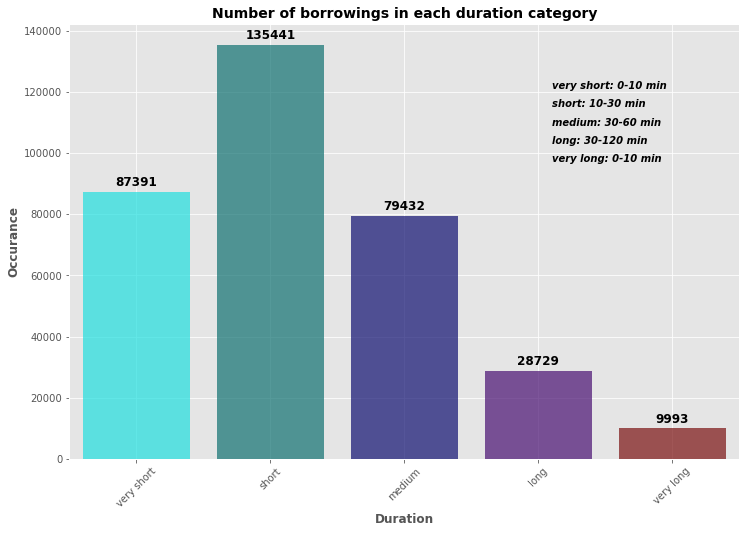

In [292]:
n_of_borrowings_categories_fig = count_plot(bikes)

The most borrowings are in short time range category (10-30 min), followed by very short time range category (0-10 min), medium time range category (30-60 min), long time range category (60-120 min) and very long time range category (120+ min), respectivelly.

In [293]:
# calculate the percentage of very short borrowings out of all borrowings
very_short_percentage = round(len(bikes[bikes['duration_category'] == 'very short']) / len(bikes) * 100)

# calculate the percentage of short borrowings out of all borrowings
short_percentage = round(len(bikes[bikes['duration_category'] == 'short']) / len(bikes) * 100)

# calculate the percentage of medium borrowings out of all borrowings
medium_percentage = round(len(bikes[bikes['duration_category'] == 'medium']) / len(bikes) * 100)

# calculate the percentage of long borrowings out of all borrowings
long_percentage = round(len(bikes[bikes['duration_category'] == 'long']) / len(bikes) * 100)

# calculate the percentage of very long borrowings out of all borrowings
very_long_percentage = round(len(bikes[bikes['duration_category'] == 'very long']) / len(bikes) * 100)

# print the results
print('Very short borrowings (0-10 min): {}%'.format(very_short_percentage))
print('Short borrowings (10-30 min): {}%'.format(short_percentage))
print('Medium borrowings (30-60 min): {}%'.format(medium_percentage))
print('Long borrowings (60-120 min): {}%'.format(long_percentage))
print('Very long borrowings (120+ min): {}%'.format(very_long_percentage))

Very short borrowings (0-10 min): 26%
Short borrowings (10-30 min): 40%
Medium borrowings (30-60 min): 23%
Long borrowings (60-120 min): 8%
Very long borrowings (120+ min): 3%


The most borrowings are in short time range category (10-30 min) - 40%, followed by very short time range category (0-10 min) - 26%, medium time range category (30-60 min) - 23%, long time range category (60-120 min) - 8% and very long time range category (120+ min) - 3%.

In [294]:
# statistical outliers - duration of borrowing more than 12 hours or 720 minutes
outliers_720 = bikes[bikes['duration_min'] > 720]
print('There are {} borrowings with duration more than 12 hours.'.format(len(outliers_720)))

# statistical outliers - duration of borrowing more than 24 hours or 1440 minutes
outliers_1440 = bikes[bikes['duration_min'] > 1440]
print('There are {} borrowings with duration more than 24 hours.'.format(len(outliers_1440)))

# statistical outliers - duration of borrowing more than 48 hours or 2880 minutes)
outliers_2880 = bikes[bikes['duration_min'] > 2880]
print('There are {} borrowings with duration more than 48 hours.'.format(len(outliers_2880)))

# statistical outliers - duration of borrowing more than 5 days or 7200 minutes)
outliers_7200 = bikes[bikes['duration_min'] > 7200]
print('There are {} borrowings with duration more than 5 days.'.format(len(outliers_7200)))

# statistical outliers - duration of borrowing more than one week or 10080 minutes)
outliers_10080 = bikes[bikes['duration_min'] > 10080]
print('There are {} borrowings with duration more than one week.'.format(len(outliers_10080)))

There are 346 borrowings with duration more than 12 hours.
There are 187 borrowings with duration more than 24 hours.
There are 84 borrowings with duration more than 48 hours.
There are 23 borrowings with duration more than 5 days.
There are 15 borrowings with duration more than one week.


In [295]:
# check the outliers_10080 dataframe
outliers_10080.head(15)

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category
14500,766,2019-01-05 18:40:07,2019-01-13 18:00:39,688832,358,Leith Walk,Leith Walk opposite Dalmeny Street,55.965040,-3.176686,249,Fountainbridge,Fountainbridge by Gardner's Crescent,55.943357,-3.209248,11481.0,very long
127456,69,2019-12-01 11:18:47,2019-12-15 02:45:58,1178830,876,Murrayfield,Riversdale Crescent,55.944767,-3.243688,1725,Edinburgh Zoo,"Corstorphine Road, Edinburgh",55.942115,-3.269287,19647.0,very long
127488,101,2019-12-01 13:16:30,2019-12-08 21:06:58,633027,290,Bruntsfield links,Corner of Bruntsfield Terrace and Bruntsfield ...,55.937159,-3.206435,1738,Wester Coates Terrace,Junction with Roseburn Terrace,55.945648,-3.231847,10550.0,very long
130421,3034,2019-12-12 15:49:05,2019-12-20 20:20:13,707468,248,Bristo Square,"Bristo Square, near Potterrow",55.945834,-3.189053,249,Fountainbridge,Fountainbridge by Gardner's Crescent,55.943357,-3.209248,11791.0,very long
130713,3326,2019-12-13 13:41:32,2019-12-23 09:41:34,849602,259,St Andrew Square,North East corner,55.954906,-3.192444,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351,14160.0,very long
132447,5060,2019-12-19 17:41:18,2019-12-29 17:02:50,861691,248,Bristo Square,"Bristo Square, near Potterrow",55.945834,-3.189053,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915,-3.118332,14362.0,very long
135805,961,2020-01-05 05:41:32,2020-01-14 16:19:33,815881,1024,Meadow Place,End of Meadow Place,55.940238,-3.194640,1024,Meadow Place,End of Meadow Place,55.940238,-3.194640,13598.0,very long
135806,962,2020-01-05 05:41:32,2020-01-16 12:58:53,976641,1024,Meadow Place,End of Meadow Place,55.940238,-3.194640,1024,Meadow Place,End of Meadow Place,55.940238,-3.194640,16277.0,very long
136551,1707,2020-01-08 14:00:39,2020-01-23 14:29:08,1297708,1098,Marchmont Crescent,Corner of Marchmont Road,55.936432,-3.194150,289,Castle Street,Near Rose Street,55.951501,-3.203184,21628.0,very long
137086,2242,2020-01-10 15:46:22,2020-01-22 14:40:21,1032838,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,1748,Colinton Road,Near Napier University Merchiston Campus,55.933416,-3.212397,17214.0,very long


### 3. Distances between stations
(spočítejte vzdálenosti mezi jednotlivými stanicemi)

In [296]:
# define calculate_distance function
def calculate_distance(start_lat, start_long, end_lat, end_long):
    R = 6373.0 # radius of the Earth
    
    latitude1 = math.radians(start_lat) # coordinates to radians
    longitude1 = math.radians(start_long) # coordinates to radians
    latitude2 = math.radians(end_lat) # coordinates to radians
    longitude2 = math.radians(end_long) # coordinates to radians
    
    deltaLatitude = latitude2 - latitude1 # change (delta) in coordinates
    deltaLongitude = longitude2 - longitude1 # change (delta) in coordinates
    
    # Haversine formula
    a = math.sin(deltaLatitude / 2) ** 2 + math.cos(latitude1) * math.cos(latitude2) * math.sin(deltaLongitude / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    
    return distance

# apply the function and create a new column with calculated distances in km between start and end stations
bikes['distance_km'] = bikes.apply(lambda x: calculate_distance(x['start_station_latitude'],
                                                                     x['start_station_longitude'],
                                                                     x['end_station_latitude'],
                                                                     x['end_station_longitude']), axis = 1)

# define kilometers_to_meters function
def km_to_m(x):
    dist_in_meters = x * 1000
    return dist_in_meters

# apply the function and create a new column with distances in meters
bikes['distance_m'] = bikes['distance_km'].apply(km_to_m)

# check the new columns with calculated distances in km and m
bikes.head()

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category,distance_km,distance_m
0,0,2018-09-15 08:52:05,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,St Andrew Square,North East corner,55.954728,-3.192653,20.0,short,0.938267,938.267462
1,1,2018-09-15 09:24:33,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284,17.0,short,0.922255,922.255332
2,2,2018-09-15 09:48:54,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116,58.0,medium,2.150913,2150.912698
3,3,2018-09-16 12:01:36,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385,24.0,short,0.189646,189.646087
4,4,2018-09-16 12:03:43,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,Kings Building 2,Sanderson Building,55.923202,-3.171646,8.0,very short,0.353751,353.751010


... distances between stations both in kilometers and meters are stored in new columns distance_km and distance_m, respectivelly. 

In [297]:
# exclude statistical outliers in distance_m that would distort the fllowing scatter plot
bikes_no_distance_outliers = bikes[bikes['start_station_name'] != 'City Chambers Launch Station']
bikes_no_distance_outliers = bikes[bikes['end_station_name'] != 'Virtual Depot']
bikes_no_distance_outliers = bikes[bikes['end_station_name'] != 'Smarter Travel Station']

In [298]:
# define scatterplot function
def scatter_plot(df):
    fig = plt.figure(figsize = (12,8))
    plt.style.use('ggplot')
    
    sns.scatterplot(x = 'distance_m', y = 'duration_min', data = df, hue = 'duration_category',
                    palette = ['purple', 'teal', 'navy', 'indigo', 'darkred'],
                    style = 'duration_category', legend = 'full', markers = ['o', 'p', 'h','*', 'P'])
    
    plt.axhline(y = 2880, ls = '--', lw = 1.0, alpha = 0.5, c = 'black')
    plt.axhline(y = 10080, ls = '--', lw = 1.0, alpha = 0.7, c = 'black')
    plt.axhline(y = 20160, ls = '--', lw = 1.0, alpha = 0.9, c = 'black')
    
    plt.text(12600, 3080, '2 days', fontsize = 10, fontweight = 'semibold')
    plt.text(12600, 10280, '1 week', fontsize = 10, fontweight = 'semibold')
    plt.text(12600, 20360, '2 weeks', fontsize = 10, fontweight = 'semibold')
    
    plt.xlabel('Distance (in meters)', fontsize = 12, fontweight = 'semibold')
    plt.ylabel('Duration of the borrowing (in minutes)', fontsize = 12, fontweight = 'semibold')
    plt.title('Distance between start/end station and duration of all borrowings', fontsize = 14, fontweight = 'semibold')
    
    plt.show()
    return fig

C:\Users\User\anaconda3\envs\datascience\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


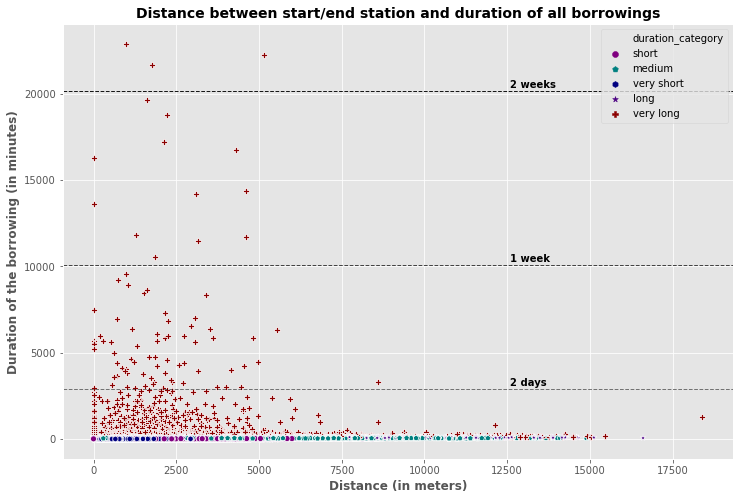

In [299]:
distance_duration_fig = scatter_plot(bikes_no_distance_outliers)

... the figure above shows the relationship of distance between start station and end station and duration of every single borrowing. However, the relationship cannot be properly observed due to high numbers in duration in 'very long' category. So, in the figure bellow, these data entries will be removed in order to display the relationship more clearly. Apart from this relationship, this figure also shows how many borrowings are considered as outliers which can be observed above the 2 days, 1 week and 2 weeks lines.

In [300]:
# exclude statistical outliers in duration column from the dataframe
without_outliers_data = bikes_no_distance_outliers[bikes_no_distance_outliers['duration_category'].isin(['very short', 'short', 'medium', 'long'])]

# redefine scatterplot function
def scatter_plot(df):
    fig = plt.figure(figsize = (12,8))
    plt.style.use('ggplot')
    
    sns.scatterplot(x = 'distance_m', y = 'duration_min', data = df, hue = 'duration_category',
                    palette = ['purple', 'teal', 'navy', 'indigo'],
                    style = 'duration_category', legend = 'full', markers = ['<', '>','v', '^'])
    
    plt.xlabel('Distance (in meters)', fontsize = 12, fontweight = 'semibold')
    plt.ylabel('Duration of the borrowing (in minutes)', fontsize = 12, fontweight = 'semibold')
    plt.title('Distance between start/end station and duration of borrowings (without outliers)', fontsize = 14, fontweight = 'semibold')
    
    x = [0, 2500, 5000, 7500, 10000, 12500, 15000]
    y = [0, 10, 20, 30, 40, 50, 60]
    z = [700, 700, 700, 700, 700, 700, 700]
    w = [0, 20, 40, 60, 80, 100, 120]
    
    plt.plot(x, y, color = 'black', lw = 1.5)
    plt.plot(x, y, color = 'black', lw = 50, alpha = 0.2)
    plt.plot(z, w, color = 'black', lw = 1.5)
    plt.plot(z, w, color = 'black', lw = 50, alpha = 0.2)
    
    plt.show()
    return fig

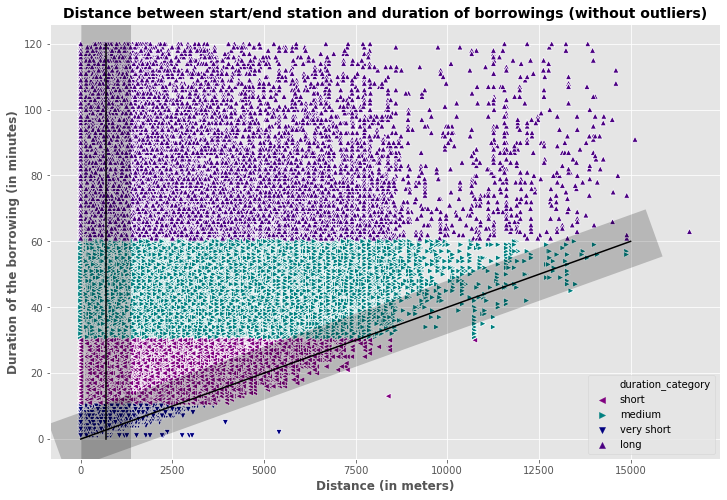

In [301]:
distance_duration_no_outliers_fig = scatter_plot(without_outliers_data)

... this figure excluded outliers in the duration of the borrowing, which means that now it can be observed that the borrowings with higher distance between start and end station tend to take longer time than those with shorter distances (represented by the leaning black linear line and correspondingly leaning grey margin). These users can be classified as users who just want to move from place A to place B, and the following applies: the longer the distance between these places is, the more time these borrowings take. However, one might notice that there is plenty of data entries in relatively short distances between start and end station that take plenty of time (represented by the vertical black linear line and corresponding vertical grey margin), which might indicate that these users borrow bikes not in order to move from place A to place B in the shortest possible time, but rather to just ride them around for fun as a means of free time activity and return them back in the area where they started, so the real distance they might possible cover in this longer time period could be higher, they just return the bikes: a) either to the same station where they started or b) to the station very close their starting point. The crucial realization in this case is that the distance is measured between start station and end station, not the real distance people cover on the bikes.

### 4. Most frequently used stations
(identifikujte nejfrekventovanější stanice)

In [302]:
# filter top 20 most frequently used start stations
most_frequently_used_start_stations = bikes['start_station_name'].value_counts().sort_values(ascending = False).head(20)

# print top 20 most frequently used start stations
print(most_frequently_used_start_stations)

Meadows East               12715
Bristo Square              10999
St Andrew Square           10372
Meadow Place                8662
Victoria Quay               8140
Portobello - Kings Road     8036
Castle Street               7628
Canonmills                  7589
Fountainbridge              7081
Dundee Terrace              6910
Charlotte Square            6834
Waverley Bridge             6769
Leith Walk                  6554
Pollock Halls               6076
Brunswick Place             5938
Duke Street                 5617
Cramond Foreshore           5600
George Square               5330
Ocean Terminal              5236
Lauriston Place             5218
Name: start_station_name, dtype: int64


In [303]:
# create a list containing their names
most_freq_start_stations_list = ['Meadows East', 'Bristo Square', 'St Andrew Square', 'Meadow Place',
                                 'Victoria Quay', 'Portobello - Kings Road', 'Castle Street', 'Canonmills',
                                 'Fountainbridge', 'Dundee Terrace', 'Charlotte Square', 'Waverley Bridge',
                                 'Leith Walk', 'Pollock Halls', 'Brunswick Place', 'Duke Street',
                                 'Cramond Foreshore', 'George Square', 'Ocean Terminal', 'Lauriston Place']

In [304]:
# filter top 20 most frequently used end stations
most_frequently_used_end_stations = bikes['end_station_name'].value_counts().sort_values(ascending = False).head(20)

# print top 20 most frequently used end stations
print(most_frequently_used_end_stations)

Victoria Quay              11479
Meadows East               11371
Portobello - Kings Road    10091
Canonmills                  9482
Leith Walk                  9326
Duke Street                 7961
Meadow Place                7120
Dundee Terrace              7019
Ocean Terminal              6991
St Andrew Square            6943
Stockbridge                 6779
Bristo Square               6672
Waverley Bridge             6654
Cramond Foreshore           6586
Brunswick Place             6551
Fountainbridge              6160
Castle Street               6029
George Square               5302
Portobello                  5146
South Trinity Road          5106
Name: end_station_name, dtype: int64


In [305]:
# create a list containing their names
most_freq_end_stations_list = ['Victoria Quay', 'Meadows East', 'Portobello - Kings Road', 'Canonmills',
                                 'Leith Walk', 'Duke Street', 'Meadow Place', 'Dundee Terrace',
                                 'Ocean Terminal', 'St Andrew Square', 'Stockbridge', 'Bristo Square',
                                 'Waverley Bridge', 'Cramond Foreshore', 'Brunswick Place', 'Fountainbridge',
                                 'Castle Street', 'George Square', 'Portobello', 'South Trinity Road']

In [306]:
# iniciate a new list of most frequently used stations in total
most_frequently_used_stations = []

# combine the lists of 20 most frequently used start and 20 end stations to get the most frequently used stations overall
for start_station in most_freq_start_stations_list:
    if start_station not in most_frequently_used_stations:
        most_frequently_used_stations.append(start_station)
        
for end_station in most_freq_end_stations_list:
    if end_station not in most_frequently_used_stations:
        most_frequently_used_stations.append(end_station)
        
# print the list containing most frequently used stations in total
print(most_frequently_used_stations)

['Meadows East', 'Bristo Square', 'St Andrew Square', 'Meadow Place', 'Victoria Quay', 'Portobello - Kings Road', 'Castle Street', 'Canonmills', 'Fountainbridge', 'Dundee Terrace', 'Charlotte Square', 'Waverley Bridge', 'Leith Walk', 'Pollock Halls', 'Brunswick Place', 'Duke Street', 'Cramond Foreshore', 'George Square', 'Ocean Terminal', 'Lauriston Place', 'Stockbridge', 'Portobello', 'South Trinity Road']


... as it can be seen above, the most frequently used stations are: Meadows East, Bristo Square, St Andrew Square, Meadow Place, Victoria Quay, Portobello - Kings Road, Castle Street, Canonmills, Fountainbridge, Dundee Terrace, Charlotte Square, Waverley Bridge, Leith Walk, Pollock Halls, Brunswick Place, Duke Street, Cramond Foreshore, George Square, Ocean Terminal, Lauriston Place, Stockbridge, Portobello and South Trinity Road

### 5. Stations with potential surplus/deficit of bikes
(identifikujte stanice, na kterých se kola hromadí a stanice, kde potenciálně chybí)

In order to find the stations where there is a potential surplus or deficit of bikes, I can use the kind of simimilar approach as in the previous section. Potential surplus of bikes will be at stations with high number of occurances in end_station_name and potential deficit of bikes will be at stations with high number of occurances in start_station_name. However, the lists of most frequently used start stations and most frequently used end stations from the previous section were almost identical, and therefore it is essential to compare not only the names of these stations in both lists, but also the numbers of occurances to see the difference representing either the surplus or deficit.

In [307]:
# check the length of start_station_name and end_station_name
print(len(bikes['start_station_name'].unique()))
print(len(bikes['end_station_name'].unique()))

169
170


... as it can be seen above, there is a mis-match in number of start and end stations. It is important to find out which stations are missing and which stations are different ...

In [308]:
# create helper lists
s_stations = bikes['start_station_name'].unique().tolist()
e_stations = bikes['end_station_name'].unique().tolist()
in_s_not_in_e = []
in_e_not_in_s = []


for e_name in e_stations:
    if e_name not in s_stations:
        in_e_not_in_s.append(e_name)
        
for s_name in s_stations:
    if s_name not in e_stations:
        in_s_not_in_e.append(s_name)
        
# print both lists
print(in_s_not_in_e)
print(in_e_not_in_s)

['City Chambers Launch Station']
['Virtual Depot', 'Smarter Travel Station']


... City Chambers Launch Station is not present in end stations, and therefore it is reasonable to assume that this station cannot have surplus of bikes if nobody leaves them at this station and only pick them up there. However, there is a potential threat of deficit of bikes.

... Virtual Depot and Smarter Travel Station are not present in start stations, which means that people only leave the bikes there and not pick them up, therefore it is obvious that those two stations usually have surplus of bikes.

#### Summary:
##### Surplus: Virtual Depot and Smarter Travel Station
##### Deficit: City Chambers Launch Station

... now, when missing and different stations are sorted out, it is useful to exclude them from further analysis ...

In [309]:
# exclude missing and different stations
bikes = bikes[bikes['start_station_name'] != 'City Chambers Launch Station']
bikes = bikes[bikes['end_station_name'] != 'Virtual Depot']
bikes = bikes[bikes['end_station_name'] != 'Smarter Travel Station']

# check the dataframe
print(bikes[bikes['start_station_name'] == 'City Chambers Launch Station'])
print(bikes[bikes['end_station_name'] == 'Virtual Depot'])
print(bikes[bikes['end_station_name'] == 'Smarter Travel Station'])

Empty DataFrame
Columns: [index, started_at, ended_at, duration, start_station_id, start_station_name, start_station_description, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_description, end_station_latitude, end_station_longitude, duration_min, duration_category, distance_km, distance_m]
Index: []
Empty DataFrame
Columns: [index, started_at, ended_at, duration, start_station_id, start_station_name, start_station_description, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_description, end_station_latitude, end_station_longitude, duration_min, duration_category, distance_km, distance_m]
Index: []
Empty DataFrame
Columns: [index, started_at, ended_at, duration, start_station_id, start_station_name, start_station_description, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_description, end_station_latitude, end_station_longitude, duration_min, d

... Empty DataFrame - chosen stations successfully excluded 

In [310]:
# check again the length of start_station_name and end_station_name
print(len(bikes['start_station_name'].unique()))
print(len(bikes['end_station_name'].unique()))

168
168


... same length, same names - prepared for the comparison

In [311]:
# create a new dataframe
surplus_deficit = pd.DataFrame()

# add a new column with the names of all stations in the dataset
surplus_deficit['station_name'] = bikes['start_station_name'].unique()

# sort the names alphabetically
surplus_deficit = surplus_deficit.sort_values('station_name')

# check the new column
surplus_deficit

,station_name
145,Abbeyhill
77,Balgreen
139,Balgreen Road
119,Belford Road
148,Boroughmuir
...,...
74,Wester Coates Terrace
57,Western General
135,Western General Hospital
39,Whitehouse Loan


In [312]:
# create a helper series
helper_series_start = bikes['start_station_name'].value_counts().sort_index(ascending = True)

# create a helper list
helper_list_start = helper_series_start.tolist()
print(helper_list_start)

[3360, 80, 1779, 810, 2870, 544, 10999, 5938, 447, 2063, 4571, 1192, 7589, 7628, 4173, 3748, 1488, 6834, 4604, 2460, 2859, 859, 6, 1687, 18, 1158, 5600, 9, 2721, 1, 325, 380, 3015, 1080, 2, 3, 341, 1785, 2563, 5617, 25, 3277, 6910, 2884, 2938, 3302, 29, 207, 630, 841, 791, 498, 3, 380, 45, 7081, 1220, 5330, 42, 2010, 2565, 2243, 55, 1290, 19, 2241, 1860, 86, 621, 215, 45, 3710, 116, 316, 6, 2620, 926, 1995, 393, 2052, 110, 11, 3302, 3061, 3116, 2664, 957, 1584, 249, 45, 5218, 481, 6554, 344, 1527, 3905, 984, 3210, 2938, 8662, 74, 43, 12715, 1725, 947, 3638, 1236, 260, 858, 44, 167, 174, 1411, 5, 5236, 1224, 1, 231, 2, 864, 6076, 186, 140, 3934, 8036, 1030, 39, 41, 834, 2147, 4054, 319, 6, 1, 19, 1771, 117, 704, 471, 2169, 4155, 10372, 2717, 46, 55, 5072, 2148, 4, 169, 476, 600, 1368, 4932, 178, 8140, 1836, 477, 3791, 6768, 2114, 1669, 3271, 19, 1937, 358, 1110, 243, 61]


In [313]:
# add a new column with number_of_occurances_start, using previously created helper list
surplus_deficit['number_of_starts'] = helper_list_start

# check the new column
surplus_deficit

,station_name,number_of_starts
145,Abbeyhill,3360
77,Balgreen,80
139,Balgreen Road,1779
119,Belford Road,810
148,Boroughmuir,2870
...,...,...
74,Wester Coates Terrace,1937
57,Western General,358
135,Western General Hospital,1110
39,Whitehouse Loan,243


In [314]:
# create a helper series
helper_series_end = bikes['end_station_name'].value_counts().sort_index(ascending = True)

# create a helper list
helper_list_end = helper_series_end.tolist()
print(helper_list_end)

[3689, 101, 2100, 766, 2942, 473, 6672, 6551, 474, 1364, 2966, 858, 9482, 6029, 3341, 3693, 858, 4248, 2223, 1831, 3885, 1690, 7, 1770, 20, 1408, 6586, 9, 2320, 2, 275, 514, 3351, 1172, 3, 5, 389, 1583, 4139, 7961, 24, 4330, 7019, 3713, 2386, 3400, 23, 218, 649, 1024, 680, 466, 6, 323, 33, 6160, 1248, 5302, 41, 1945, 3030, 2189, 50, 1505, 11, 2033, 1684, 91, 657, 190, 35, 4336, 139, 356, 5, 3024, 939, 1745, 488, 2322, 170, 7, 4466, 3776, 3410, 2449, 955, 1627, 195, 49, 3014, 784, 9326, 462, 1964, 2791, 1298, 2442, 3227, 7120, 55, 42, 11371, 2073, 1120, 4224, 1191, 270, 882, 60, 213, 311, 2278, 6, 6991, 1180, 1, 159, 6, 819, 4603, 173, 148, 5146, 10091, 1056, 51, 22, 864, 2113, 3457, 261, 8, 2, 32, 1878, 111, 1127, 573, 2033, 5106, 6943, 1657, 63, 66, 6779, 1483, 3, 151, 622, 447, 988, 4819, 233, 11479, 2155, 739, 2919, 6654, 1990, 1340, 2423, 18, 2088, 400, 1122, 106, 85]


In [315]:
# add a new column with number_of_occurances_end, using previously created helper list
surplus_deficit['number_of_ends'] = helper_list_end

# check the new column
surplus_deficit

,station_name,number_of_starts,number_of_ends
145,Abbeyhill,3360,3689
77,Balgreen,80,101
139,Balgreen Road,1779,2100
119,Belford Road,810,766
148,Boroughmuir,2870,2942
...,...,...,...
74,Wester Coates Terrace,1937,2088
57,Western General,358,400
135,Western General Hospital,1110,1122
39,Whitehouse Loan,243,106


In [316]:
# create a new column with the differenece = start - end
surplus_deficit['difference'] = surplus_deficit['number_of_starts'] - surplus_deficit['number_of_ends']

# check the new column
surplus_deficit

,station_name,number_of_starts,number_of_ends,difference
145,Abbeyhill,3360,3689,-329
77,Balgreen,80,101,-21
139,Balgreen Road,1779,2100,-321
119,Belford Road,810,766,44
148,Boroughmuir,2870,2942,-72
...,...,...,...,...
74,Wester Coates Terrace,1937,2088,-151
57,Western General,358,400,-42
135,Western General Hospital,1110,1122,-12
39,Whitehouse Loan,243,106,137


In [317]:
# define surplus/deficit classification function
def classify_surplus_deficit(x):
    if x > 0:
        return 'SURPLUS'
    if x < 0:
        return 'DEFICIT'
    else:
        'BALANCE'
        
# apply the function and create a new column
surplus_deficit['surplus/deficit'] = surplus_deficit['difference'].apply(classify_surplus_deficit)

# check the new column
surplus_deficit

,station_name,number_of_starts,number_of_ends,difference,surplus/deficit
145,Abbeyhill,3360,3689,-329,DEFICIT
77,Balgreen,80,101,-21,DEFICIT
139,Balgreen Road,1779,2100,-321,DEFICIT
119,Belford Road,810,766,44,SURPLUS
148,Boroughmuir,2870,2942,-72,DEFICIT
...,...,...,...,...,...
74,Wester Coates Terrace,1937,2088,-151,DEFICIT
57,Western General,358,400,-42,DEFICIT
135,Western General Hospital,1110,1122,-12,DEFICIT
39,Whitehouse Loan,243,106,137,SURPLUS


In [318]:
# find out how many stations are in surplus
print('Number of stations in long-term surplus: {}'.format(len(surplus_deficit[surplus_deficit['surplus/deficit'] == 'SURPLUS'])))

# find out how many stations are in deficit
print('Number of stations in long-term deficit: {}'.format(len(surplus_deficit[surplus_deficit['surplus/deficit'] == 'DEFICIT'])))

Number of stations in long-term surplus: 74
Number of stations in long-term deficit: 92


In [319]:
# create the list with names of stations which are in surplus
stations_in_surplus = surplus_deficit[surplus_deficit['surplus/deficit'] == 'SURPLUS']['station_name'].tolist()

# print the list
print(stations_in_surplus)

['Belford Road', 'Borrowman Square', 'Bristo Square', 'Bruntsfield', 'Bruntsfield Links', 'Bruntsfield links', 'Castle Street', 'Castle Terrace', 'Causewayside', 'Chambers Street', 'Charlotte Square', 'City Chambers', 'Colinton Road', 'Crichton Street', 'Dalmeny Station', 'Drumsheugh Place', 'Dunbar’s Close Garden', 'EICC', 'Eden Locke - Aparthotel (RESIDENTS ONLY)', 'Edinburgh Zoo', 'Ellersly Road', 'Forth Bridge Visitors Centre', 'Fountain Court  - Apartments (RESIDENTS ONLY)', 'Fountainbridge', 'George Square', 'Gibson Terrace', 'Gladstone Terrace', 'Grassmarket', 'HSBC UK Lets Ride - Meadows Event', 'Haymarket - Murrayfield Rugby Event', 'Haymarket Station', 'Haymarket Terrace', 'Heriot Watt - Student Accommodation', 'Heriot Watt - Student Accomodation (Anna MacLeod Halls)', "Holyrood Park - Woman's Tour Of Scotland (Event 11/08/19)", 'Hunter Square', 'Ingliston Park and Ride (19th to 23rd June)', 'Kings Building 3', 'Kings Buildings - Murchison House', 'Kings Buildings 4', 'Lauris

In [320]:
# create the list with names of stations which are in deficit
stations_in_deficit = surplus_deficit[surplus_deficit['surplus/deficit'] == 'DEFICIT']['station_name'].tolist()

# print the list
print(stations_in_deficit)

['Abbeyhill', 'Balgreen', 'Balgreen Road', 'Boroughmuir', 'Brunswick Place', 'Brunswick Place - Virtual', 'Canonmills', 'Comely Bank Road', 'Constitution Street', 'Corn Exchange - walk cycle event', 'Corstorphine Road', 'Corstorphine Road - Pinkhill', 'Craigleith Road', 'Cramond Foreshore', 'Cycling Scotland Conference', 'Dalry Road Co-op', 'Dalry Road Lidl', 'Dean Street', 'Depot', 'Depot Virtual', 'Drummond Street', 'Dudley Gardens', 'Duke Street', 'Dundas Street', 'Dundee Terrace', 'Dynamic Earth', 'East London Street', 'Edinburgh Park Central', 'Edinburgh Park Station', 'Edinburgh Royal Infirmary', 'Fort Kinnaird', "Gamekeeper's Road", 'Gorgie Road', 'Hawes Pier', 'Henderson Row', 'Heriot Watt - Edinburgh Business School', 'Hillside Crescent', 'Hillside Crescent 1', 'Hillside Crescent 2', 'Holyrood Road', 'Hopetoun Road', 'IGMM', 'IGMM - Western General', 'Ingliston Park & Ride', 'Inverleith Row', 'Joppa', 'Kings Building 2', 'Kings Buildings 1', 'Launch Day Event', 'Leith Links', 

In [321]:
# define plot function
def plot_surplus_deficit(df):
    fig = plt.figure(figsize = (12,8))
    plt.style.use('ggplot')
    ax = sns.countplot(data = df, x = 'surplus/deficit', alpha = 0.7,
                  palette = ['teal', 'indigo'],
                  order = ['SURPLUS', 'DEFICIT'])
    
    plt.xlabel('Surplus/Deficit', fontsize = 12, fontweight = 'semibold')
    plt.ylabel('Number of stations', fontsize = 12, fontweight = 'semibold')
    plt.title('Number of stations in each surplus/deficit category', fontsize = 14,
              fontweight = 'semibold')
    plt.grid(True)
    
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()),
                    xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext = (0, 3), textcoords = "offset points",
                    ha = 'center', va = 'bottom', fontsize = 12,
                    fontweight = 'semibold')
    
    plt.show()
    return fig

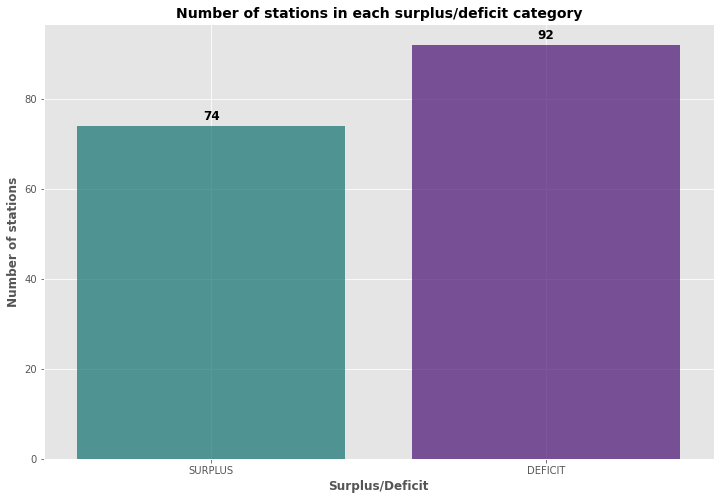

In [322]:
surplus_deficit_fig = plot_surplus_deficit(surplus_deficit)

In [323]:
# calculate the descriptive statistics
surplus_percentage = len(stations_in_surplus) / (len(stations_in_surplus) + len(stations_in_deficit)) * 100
deficit_percentage = len(stations_in_deficit) / (len(stations_in_surplus) + len(stations_in_deficit)) * 100  
average_surplus_deficit = surplus_deficit['difference'].mean()
median_surplus_deficit = surplus_deficit['difference'].median()
standard_deviation_surplus_deficit = surplus_deficit['difference'].std()
highest_surplus = surplus_deficit['difference'].max()
highest_deficit = surplus_deficit['difference'].min()

# print the descriptive statistics
print('Percentage of stations in surplus: {}%'.format(round(surplus_percentage)))
print('Percentage of stations in deficit: {}%'.format(round(deficit_percentage)))
print('Average surplus/deficit: {}'.format(average_surplus_deficit))
print('Median surplus/deficit: {}'.format(median_surplus_deficit))
print('Standard deviation: {}'.format(round(standard_deviation_surplus_deficit)))
print('Highest surplus: {}'.format(highest_surplus))
print('Highest deficit: {}'.format(highest_deficit))

Percentage of stations in surplus: 45%
Percentage of stations in deficit: 55%
Average surplus/deficit: 0.0
Median surplus/deficit: -2.5
Standard deviation: 854
Highest surplus: 4327
Highest deficit: -3339


... as it can be seen above, 45% of stations are in surplus, 55% in deficit. Average surplus is 0.0, indicating there is a balance on average. Median value is a little bit lower than average (because median is not influenced by statistical outliers), and it implies that there is a higher variance on the surplus side which is distorting the average upwards. The reason can be clearly seen in the value of highest surplus, which is relatively more distant (in absolute value) from zero than the counterpart represented by highest deficit (in absolute value).

In [324]:
# find out which of the most frequently used stations are in surplus and which are in dificit
most_frequently_used_stations_surplus_deficit = surplus_deficit[surplus_deficit['station_name'].isin(most_frequently_used_stations)].reset_index()

# display the most frequently used stations to check which of them are in surplus or deficit
most_frequently_used_stations_surplus_deficit

,index,station_name,number_of_starts,number_of_ends,difference,surplus/deficit
0,16,Bristo Square,10999,6672,4327,SURPLUS
1,14,Brunswick Place,5938,6551,-613,DEFICIT
2,2,Canonmills,7589,9482,-1893,DEFICIT
3,31,Castle Street,7628,6029,1599,SURPLUS
4,0,Charlotte Square,6834,4248,2586,SURPLUS
5,62,Cramond Foreshore,5600,6586,-986,DEFICIT
6,149,Duke Street,5617,7961,-2344,DEFICIT
7,42,Dundee Terrace,6910,7019,-109,DEFICIT
8,18,Fountainbridge,7081,6160,921,SURPLUS
9,15,George Square,5330,5302,28,SURPLUS


In [325]:
# redefine and adjust plot function
def plot_surplus_deficit(df):
    fig = plt.figure(figsize = (12,8))
    plt.style.use('ggplot')
    sns.countplot(data = df, y = 'surplus/deficit', alpha = 0.7,
                  palette = ['navy', 'darkred'],
                  order = ['SURPLUS', 'DEFICIT'],
                  orient = 'h')
    
    plt.xlabel('Number of stations', fontsize = 12, fontweight = 'semibold')
    plt.ylabel('Surplus/Deficit', fontsize = 12, fontweight = 'semibold')
    plt.title('Number of most frequently used stations in each surplus/deficit category', fontsize = 14,
              fontweight = 'semibold')
    plt.grid(True)
    
    plt.text(11.1, 0.0, '{}'.format(len(most_frequently_used_stations_surplus_deficit[most_frequently_used_stations_surplus_deficit['surplus/deficit'] == 'SURPLUS'])),
             fontsize = 12, fontweight = 'semibold')
    plt.text(12.1, 1.0, '{}'.format(len(most_frequently_used_stations_surplus_deficit[most_frequently_used_stations_surplus_deficit['surplus/deficit'] == 'DEFICIT'])),
             fontsize = 12, fontweight = 'semibold')
    
    plt.show()
    return fig

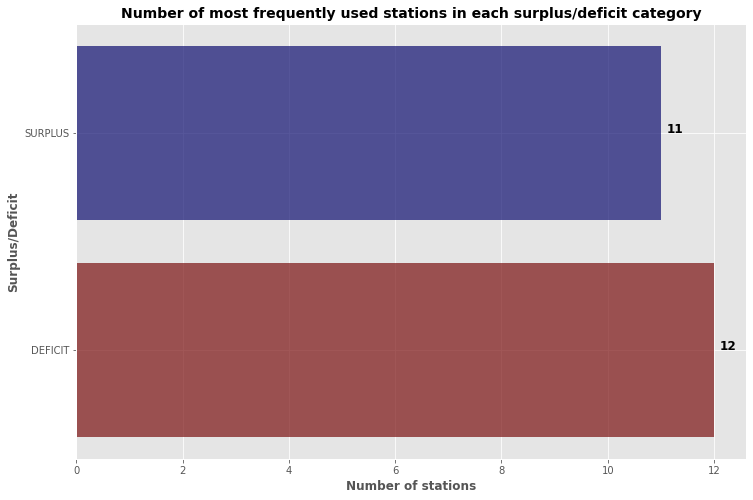

In [326]:
most_freq_surplus_deficit = plot_surplus_deficit(most_frequently_used_stations_surplus_deficit)

### 6. Active and inactive stations
(identifikujte aktivní a neaktivní stanice)

In [327]:
# make a copy of the dataframe
active_inactive = bikes.copy(deep = True)

# check the dataframe
active_inactive.head()

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category,distance_km,distance_m
0,0,2018-09-15 08:52:05,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,St Andrew Square,North East corner,55.954728,-3.192653,20.0,short,0.938267,938.267462
1,1,2018-09-15 09:24:33,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284,17.0,short,0.922255,922.255332
2,2,2018-09-15 09:48:54,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116,58.0,medium,2.150913,2150.912698
3,3,2018-09-16 12:01:36,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385,24.0,short,0.189646,189.646087
4,4,2018-09-16 12:03:43,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,Kings Building 2,Sanderson Building,55.923202,-3.171646,8.0,very short,0.353751,353.751010


In [328]:
# group by start_station_name
active_inactive_start_grouped = active_inactive.groupby('start_station_name', as_index = False).count()

# check the grouped dataframe
active_inactive_start_grouped

,start_station_name,index,started_at,ended_at,duration,start_station_id,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category,distance_km,distance_m
0,Abbeyhill,3360,3360,3360,3360,3360,3360,3360,3360,3360,3360,3349,3360,3360,3360,3360,3360,3360
1,Balgreen,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
2,Balgreen Road,1779,1779,1779,1779,1779,1779,1779,1779,1779,1779,1748,1779,1779,1779,1779,1779,1779
3,Belford Road,810,810,810,810,810,810,810,810,810,810,794,810,810,810,810,810,810
4,Boroughmuir,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2817,2870,2870,2870,2870,2870,2870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Wester Coates Terrace,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1907,1937,1937,1937,1937,1937,1937
164,Western General,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358
165,Western General Hospital,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1100,1110,1110,1110,1110,1110,1110
166,Whitehouse Loan,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243


In [329]:
# group by end_station_name
active_inactive_end_grouped = active_inactive.groupby('end_station_name', as_index = False).count()

# check the grouped dataframe
active_inactive_end_grouped

,end_station_name,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category,distance_km,distance_m
0,Abbeyhill,3689,3689,3689,3689,3689,3689,3676,3689,3689,3689,3689,3689,3689,3689,3689,3689,3689
1,Balgreen,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
2,Balgreen Road,2100,2100,2100,2100,2100,2100,2047,2100,2100,2100,2100,2100,2100,2100,2100,2100,2100
3,Belford Road,766,766,766,766,766,766,759,766,766,766,766,766,766,766,766,766,766
4,Boroughmuir,2942,2942,2942,2942,2942,2942,2881,2942,2942,2942,2942,2942,2942,2942,2942,2942,2942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Wester Coates Terrace,2088,2088,2088,2088,2088,2088,2068,2088,2088,2088,2088,2088,2088,2088,2088,2088,2088
164,Western General,400,400,400,400,400,400,399,400,400,400,400,400,400,400,400,400,400
165,Western General Hospital,1122,1122,1122,1122,1122,1122,1114,1122,1122,1122,1122,1122,1122,1122,1122,1122,1122
166,Whitehouse Loan,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106


In [330]:
# create a new dataframe with the counts of start stations and end stations
active_inactive_counts = pd.DataFrame()

# add a new column with names of all stations 
active_inactive_counts['station_name'] = active_inactive_start_grouped['start_station_name']

# add a new column with start station counts
active_inactive_counts['start_station_counts'] = active_inactive_start_grouped['index']

# add a new column with end station counts
active_inactive_counts['end_station_counts'] = active_inactive_end_grouped['index']

# create a new column with the sum of start and end station counts
active_inactive_counts['total_count'] = active_inactive_counts['start_station_counts'] + active_inactive_counts['end_station_counts']

# check the dataframe
active_inactive_counts.head()

,station_name,start_station_counts,end_station_counts,total_count
0,Abbeyhill,3360,3689,7049
1,Balgreen,80,101,181
2,Balgreen Road,1779,2100,3879
3,Belford Road,810,766,1576
4,Boroughmuir,2870,2942,5812


The classification of active and inactive stations will be performed on the following criteria: if the count of a station is bellow median count, this station will be classified as inactive, and if the count of a station is equal to or above median count, this station will be classified as active ...

In [331]:
# calculate the median count of a station
median_count = active_inactive_counts['total_count'].median()

# print the median count
print('Median count: {}'.format(median_count))

Median count: 2314.0


In [332]:
# define classify_active_inactive function
def classify_active_inactive(x):
    if x >= median_count:
        return 'ACTIVE'
    if x < median_count:
        return 'INACTIVE'
    
# apply the function and create a new column with classification of active/inactive station
active_inactive_counts['active/inactive'] = active_inactive_counts['total_count'].apply(classify_active_inactive)

# chech the dataframe
active_inactive_counts.head()

,station_name,start_station_counts,end_station_counts,total_count,active/inactive
0,Abbeyhill,3360,3689,7049,ACTIVE
1,Balgreen,80,101,181,INACTIVE
2,Balgreen Road,1779,2100,3879,ACTIVE
3,Belford Road,810,766,1576,INACTIVE
4,Boroughmuir,2870,2942,5812,ACTIVE


In [333]:
# create a list of active stations
active_stations_list = active_inactive_counts[active_inactive_counts['active/inactive'] == 'ACTIVE']['station_name'].tolist()

# create a list of inactive stations
inactive_stations_list = active_inactive_counts[active_inactive_counts['active/inactive'] == 'INACTIVE']['station_name'].tolist()

# print the list of active stations
print(active_stations_list)

['Abbeyhill', 'Balgreen Road', 'Boroughmuir', 'Bristo Square', 'Brunswick Place', 'Bruntsfield', 'Bruntsfield Links', 'Canonmills', 'Castle Street', 'Castle Terrace', 'Causewayside', 'Chambers Street', 'Charlotte Square', 'City Chambers', 'Colinton Road', 'Comely Bank Road', 'Constitution Street', 'Corstorphine Road', 'Craigleith Road', 'Cramond Foreshore', 'Crichton Street', 'Dalry Road Lidl', 'Drumsheugh Place', 'Dudley Gardens', 'Duke Street', 'Dundas Street', 'Dundee Terrace', 'Dynamic Earth', 'EICC', 'East London Street', 'Fountainbridge', "Gamekeeper's Road", 'George Square', 'Gladstone Terrace', 'Gorgie Road', 'Grassmarket', 'Hawes Pier', 'Haymarket Station', 'Haymarket Terrace', 'Hillside Crescent', 'Holyrood Road', 'Hunter Square', 'IGMM - Western General', 'Inverleith Row', 'Joppa', 'Kings Building 2', 'Kings Building 3', 'Kings Buildings 1', 'Lauriston Place', 'Leith Walk', 'Logie Green Road', 'Lothian Road', 'Marchmont Crescent', 'McDonald Road', 'Meadow Place', 'Meadows Ea

In [334]:
# print the list of inactive stations
print(inactive_stations_list)

['Balgreen', 'Belford Road', 'Borrowman Square', 'Brunswick Place - Virtual', 'Bruntsfield links', 'Corn Exchange - walk cycle event', 'Corstorphine Road - Pinkhill', 'Crescent House', 'Cycling Scotland Conference', 'Dalmeny Station', 'Dalry Road Co-op', 'Dean Street', 'Depot', 'Depot Virtual', 'Drummond Street', 'Dunbar’s Close Garden', 'Eden Locke - Aparthotel (RESIDENTS ONLY)', 'Edinburgh Park Central', 'Edinburgh Park Station', 'Edinburgh Royal Infirmary', 'Edinburgh Zoo', 'Ellersly Road', 'Fort Kinnaird', 'Forth Bridge Visitors Centre', 'Fountain Court  - Apartments (RESIDENTS ONLY)', 'Gibson Terrace', 'HSBC UK Lets Ride - Meadows Event', 'Haymarket - Murrayfield Rugby Event', 'Henderson Row', 'Heriot Watt - Edinburgh Business School', 'Heriot Watt - Student Accommodation', 'Heriot Watt - Student Accomodation (Anna MacLeod Halls)', 'Hillside Crescent 1', 'Hillside Crescent 2', "Holyrood Park - Woman's Tour Of Scotland (Event 11/08/19)", 'Hopetoun Road', 'IGMM', 'Ingliston Park & R

... names of active and inactive stations are stored in lists active_stations_list and inactive_stations_list, respectively.

In [335]:
# check the length of both lists to see whether the median count criterium was properly executed
print('Number of active stations: {}'.format(len(active_stations_list)))
print('Number of inactive stations: {}'.format(len(inactive_stations_list)))

# check the total lenght
print('Number of total stations: {}'.format(len(active_stations_list) + len(inactive_stations_list)))

Number of active stations: 84
Number of inactive stations: 84
Number of total stations: 168


... as it can be seen above, the median count criterium (the middle value) was properly executed.

For the sake of the complexity, let's classify the stations into quartile categories with respect to their counts: lower quartile 0-25%: most inactive, 25-50%: relatively inactive, 50-75%: relatively active, upper 75-100% most active.  

In [336]:
# calculate lower quartile
lower_Q = active_inactive_counts['total_count'].quantile(q = 0.25, interpolation = 'linear') 

# calculate upper quartile
upper_Q = active_inactive_counts['total_count'].quantile(q = 0.75, interpolation = 'linear')

# define classify_quartiles function
def classify_quartiles(x):
    if x < lower_Q:
        return 'MOST INACTIVE'
    if x > lower_Q and x < median_count:
        return 'RELATIVELY INACTIVE'
    if x > median_count and x < upper_Q:
        return 'RELATIVELY ACTIVE'
    if x > upper_Q:
        return 'MOST ACTIVE'
    
# apply the function and crate a new column with quartile category
active_inactive_counts['quartile_category'] = active_inactive_counts['total_count'].apply(classify_quartiles)

# check the new column
active_inactive_counts.head()

,station_name,start_station_counts,end_station_counts,total_count,active/inactive,quartile_category
0,Abbeyhill,3360,3689,7049,ACTIVE,MOST ACTIVE
1,Balgreen,80,101,181,INACTIVE,MOST INACTIVE
2,Balgreen Road,1779,2100,3879,ACTIVE,RELATIVELY ACTIVE
3,Belford Road,810,766,1576,INACTIVE,RELATIVELY INACTIVE
4,Boroughmuir,2870,2942,5812,ACTIVE,RELATIVELY ACTIVE


In [337]:
# create a list of most inactive active stations
most_inactive_stations_list = active_inactive_counts[active_inactive_counts['quartile_category'] == 'MOST INACTIVE']['station_name'].tolist()

# create a list of relatively inactive stations
relatively_inactive_stations_list = active_inactive_counts[active_inactive_counts['quartile_category'] == 'RELATIVELY INACTIVE']['station_name'].tolist()

# create a list of relatively active stations
relatively_active_stations_list = active_inactive_counts[active_inactive_counts['quartile_category'] == 'RELATIVELY ACTIVE']['station_name'].tolist()

# create a list of most inactive stations
most_active_stations_list = active_inactive_counts[active_inactive_counts['quartile_category'] == 'MOST ACTIVE']['station_name'].tolist()

# print the list of most inactive stations
print(most_inactive_stations_list)

['Balgreen', 'Corn Exchange - walk cycle event', 'Corstorphine Road - Pinkhill', 'Crescent House', 'Cycling Scotland Conference', 'Depot', 'Depot Virtual', 'Dunbar’s Close Garden', 'Eden Locke - Aparthotel (RESIDENTS ONLY)', 'Fort Kinnaird', 'Fountain Court  - Apartments (RESIDENTS ONLY)', 'Gibson Terrace', 'HSBC UK Lets Ride - Meadows Event', 'Haymarket - Murrayfield Rugby Event', 'Henderson Row', 'Heriot Watt - Student Accomodation (Anna MacLeod Halls)', 'Hillside Crescent 1', "Holyrood Park - Woman's Tour Of Scotland (Event 11/08/19)", 'Ingliston Park & Ride', 'Ingliston Park and Ride (19th to 23rd June)', 'Launch Day Event', 'Meadow Place 2', 'Meadows - Edinburgh Climate Festival', 'Musselburgh Brunton Hall', 'Novotel', 'Picady Place', 'Pleasance - Edinburgh University Sports Fair', 'Pollock Halls Virtual', 'Port Edgar Marina', 'Queensferry Road', 'RHC - Edinburgh Festival Camping (05th to 26th August)', 'Royal Highland Show - East Gate (19th to 23rd June)', 'Royal Highland Show - 

In [338]:
# print the list of relatively inactive stations
print(relatively_inactive_stations_list)

['Belford Road', 'Borrowman Square', 'Brunswick Place - Virtual', 'Bruntsfield links', 'Dalmeny Station', 'Dalry Road Co-op', 'Dean Street', 'Drummond Street', 'Edinburgh Park Central', 'Edinburgh Park Station', 'Edinburgh Royal Infirmary', 'Edinburgh Zoo', 'Ellersly Road', 'Forth Bridge Visitors Centre', 'Heriot Watt - Edinburgh Business School', 'Heriot Watt - Student Accommodation', 'Hillside Crescent 2', 'Hopetoun Road', 'IGMM', 'Kings Buildings - Murchison House', 'Kings Buildings 4', 'Leith Links', 'Leith Walk North', 'Macdonald Road', 'Milton Road - Edinburgh College', 'Murrayfield Avenue', 'Murrayfield Tram', 'Musselburgh Lidl', 'Newhaven Road / Dudley Gardens', 'Picardy Place', 'Pleasance Courtyard', 'Queen Margaret University', 'Riego Street', 'Royal Edinburgh Hospital', 'Shrubhill', 'Sighthill - Edinburgh College', 'The Loan', 'The Tron', 'Victoria Park', 'Waitrose, Comely Bank', 'Western General', 'Western General Hospital']


In [339]:
# print the list of relatively active stations
print(relatively_active_stations_list)

['Balgreen Road', 'Boroughmuir', 'Bruntsfield', 'Chambers Street', 'Colinton Road', 'Constitution Street', 'Corstorphine Road', 'Craigleith Road', 'Crichton Street', 'Dalry Road Lidl', 'Drumsheugh Place', 'EICC', "Gamekeeper's Road", 'Gladstone Terrace', 'Gorgie Road', 'Grassmarket', 'Hawes Pier', 'Haymarket Station', 'Haymarket Terrace', 'Holyrood Road', 'Hunter Square', 'IGMM - Western General', 'Kings Building 3', 'Kings Buildings 1', 'Logie Green Road', 'Marchmont Crescent', 'McDonald Road', 'Meggetland', 'Murrayfield', 'Newkirkgate', 'Orchard Brae House', 'Roseburn Street', 'Scotland Street', 'Simon Square', 'St Andrews House', 'Surgeons Hall', 'Thirlestane Road', 'Waitrose Comely Bank', 'Waverley Court', 'Waverley Station', 'West Crosscauseway', 'Wester Coates Terrace']


In [340]:
# print the list of most active stations
print(most_active_stations_list)

['Abbeyhill', 'Bristo Square', 'Brunswick Place', 'Bruntsfield Links', 'Canonmills', 'Castle Street', 'Castle Terrace', 'Causewayside', 'Charlotte Square', 'City Chambers', 'Comely Bank Road', 'Cramond Foreshore', 'Dudley Gardens', 'Duke Street', 'Dundas Street', 'Dundee Terrace', 'Dynamic Earth', 'East London Street', 'Fountainbridge', 'George Square', 'Hillside Crescent', 'Inverleith Row', 'Joppa', 'Kings Building 2', 'Lauriston Place', 'Leith Walk', 'Lothian Road', 'Meadow Place', 'Meadows East', 'Morningside Road', 'Ocean Terminal', 'Pollock Halls', 'Portobello', 'Portobello - Kings Road', 'Royal Commonwealth Pool', 'South Trinity Road', 'St Andrew Square', 'Stockbridge', 'Tollcross', 'Victoria Quay', 'Warrender Park Road', 'Waverley Bridge']


... names of most inactive, relatively inactive, relatively active and most active stations are stored in lists in corresponding variables.

In [341]:
# check the length of all lists to see whether the quartile criterium was properly executed
print('Number of most inactive stations: {}'.format(len(most_inactive_stations_list)))
print('Number of relatively inactive stations: {}'.format(len(relatively_inactive_stations_list)))
print('Number of relatively active stations: {}'.format(len(relatively_active_stations_list)))
print('Number of most active stations: {}'.format(len(most_active_stations_list)))

# check the total lenght
print('Number of total stations: {}'.format(len(active_stations_list) + len(inactive_stations_list)))

Number of most inactive stations: 42
Number of relatively inactive stations: 42
Number of relatively active stations: 42
Number of most active stations: 42
Number of total stations: 168


... as it can be seen above, the quartile criterium was executed properly.

## Demand analysis

### 1. Demand development over time

In [342]:
# make a copy of the dataframe
demand = bikes.copy(deep = True)

# check the dataframe
demand.head()

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category,distance_km,distance_m
0,0,2018-09-15 08:52:05,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,St Andrew Square,North East corner,55.954728,-3.192653,20.0,short,0.938267,938.267462
1,1,2018-09-15 09:24:33,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284,17.0,short,0.922255,922.255332
2,2,2018-09-15 09:48:54,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116,58.0,medium,2.150913,2150.912698
3,3,2018-09-16 12:01:36,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385,24.0,short,0.189646,189.646087
4,4,2018-09-16 12:03:43,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,Kings Building 2,Sanderson Building,55.923202,-3.171646,8.0,very short,0.353751,353.751010


In [343]:
# create a new 'year' column 
demand['year'] = pd.DatetimeIndex(demand['started_at']).year

# create a new 'month' column
demand['month'] = pd.DatetimeIndex(demand['started_at']).month

# check the new columns
demand.head()

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category,distance_km,distance_m,year,month
0,0,2018-09-15 08:52:05,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,St Andrew Square,North East corner,55.954728,-3.192653,20.0,short,0.938267,938.267462,2018,9
1,1,2018-09-15 09:24:33,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284,17.0,short,0.922255,922.255332,2018,9
2,2,2018-09-15 09:48:54,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116,58.0,medium,2.150913,2150.912698,2018,9
3,3,2018-09-16 12:01:36,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385,24.0,short,0.189646,189.646087,2018,9
4,4,2018-09-16 12:03:43,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,Kings Building 2,Sanderson Building,55.923202,-3.171646,8.0,very short,0.353751,353.751010,2018,9


In [344]:
# create a new groupby object
demand_grouped = demand.groupby(by = ['year', 'month'], as_index = False).count()

# check the dataframe
demand_grouped

,year,month,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category,distance_km,distance_m
0,2018,9,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226
1,2018,10,3799,3799,3799,3799,3799,3799,3799,3799,3799,3799,3799,3799,3799,3799,3799,3799,3799,3799
2,2018,11,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045
3,2018,12,3662,3662,3662,3662,3662,3662,3662,3662,3662,3662,3662,3662,3662,3662,3662,3662,3662,3662
4,2019,1,4750,4750,4750,4750,4750,4750,4750,4750,4750,4750,4750,4750,4750,4750,4750,4750,4750,4750
5,2019,2,4222,4222,4222,4222,4222,4222,4222,4222,4222,4222,4222,4222,4222,4222,4222,4222,4222,4222
6,2019,3,6546,6546,6546,6546,6546,6546,6546,6546,6546,6546,6546,6546,6546,6546,6546,6546,6546,6546
7,2019,4,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176
8,2019,5,14160,14160,14160,14160,14160,14160,14160,14160,14160,14160,14160,14160,14160,14160,14160,14160,14160,14160
9,2019,6,10214,10214,10214,10214,10214,10214,10214,10214,10214,10214,10214,10214,10214,10214,10214,10214,10214,10214


In [345]:
# define plot_demand function
def plot_demand(df):
    fig = plt.figure(figsize = (12, 8))
    plt.style.use('ggplot')
    
    sns.lineplot(data = df, x = np.arange(0, len(df)), y = 'index', lw = 2.5, color = 'navy',
                 label = 'Demand trend')
    sns.scatterplot(data = df, x = np.arange(0, len(df)), y = 'index', s = 100, color = 'black')
    plt.bar(x = np.arange(0, len(df)), height = demand_grouped['index'],
            color = 'teal', alpha = 0.6, label = 'Number of borrowings')
    
    plt.xlabel('Date', fontsize = 12, fontweight = 'semibold')
    plt.ylabel('Number of borrowings', fontsize = 12, fontweight = 'semibold')
    plt.title('Demand for bikes over time', fontsize = 14, fontweight = 'semibold')
    
    plt.xticks(np.arange(0, len(df) + 1, 1),
               ['Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018',
                'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019',
                'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019',
                'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019',
                'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020',
                'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020',
                'Sep 2020', 'Oct 2020'], rotation = 45)
    
    plt.axvline(x = -0.5, ls = '--', lw = 1.0, alpha = 0.5, c = 'black')
    plt.axvline(x = 2.5, ls = '--', lw = 1.0, alpha = 0.5, c = 'black')
    plt.axvline(x = 5.5, ls = '--', lw = 1.0, alpha = 0.5, c = 'black')
    plt.axvline(x = 8.5, ls = '--', lw = 1.0, alpha = 0.5, c = 'black')
    plt.axvline(x = 11.5, ls = '--', lw = 1.0, alpha = 0.5, c = 'black')
    plt.axvline(x = 14.5, ls = '--', lw = 1.0, alpha = 0.5, c = 'black')
    plt.axvline(x = 17.5, ls = '--', lw = 1.0, alpha = 0.5, c = 'black')
    plt.axvline(x = 20.5, ls = '--', lw = 1.0, alpha = 0.5, c = 'black')
    plt.axvline(x = 23.5, ls = '--', lw = 1.0, alpha = 0.5, c = 'black')
    plt.axvline(x = 26.5, ls = '--', lw = 1.0, alpha = 0.5, c = 'black')
    
    plt.text(0.3, 7500, 'Autumn', fontweight = 'semibold', c = 'darkred')
    plt.text(3.3, 12500, 'Winter', fontweight = 'semibold', c = 'blue')
    plt.text(6.3, 17500, 'Spring', fontweight = 'semibold', c = 'green')
    plt.text(9.3, 22500, 'Summer', fontweight = 'semibold', c = 'orange')
    plt.text(12.3, 17500, 'Autumn', fontweight = 'semibold', c = 'darkred')
    plt.text(15.3, 12500, 'Winter', fontweight = 'semibold', c = 'blue')
    plt.text(18.0, 22500, 'Spring', fontweight = 'semibold', c = 'green')
    plt.text(21.3, 30200, 'Summer', fontweight = 'semibold', c = 'orange')
    plt.text(24.3, 27500, 'Autumn', fontweight = 'semibold', c = 'darkred')
    
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    
    plt.show()
    return fig

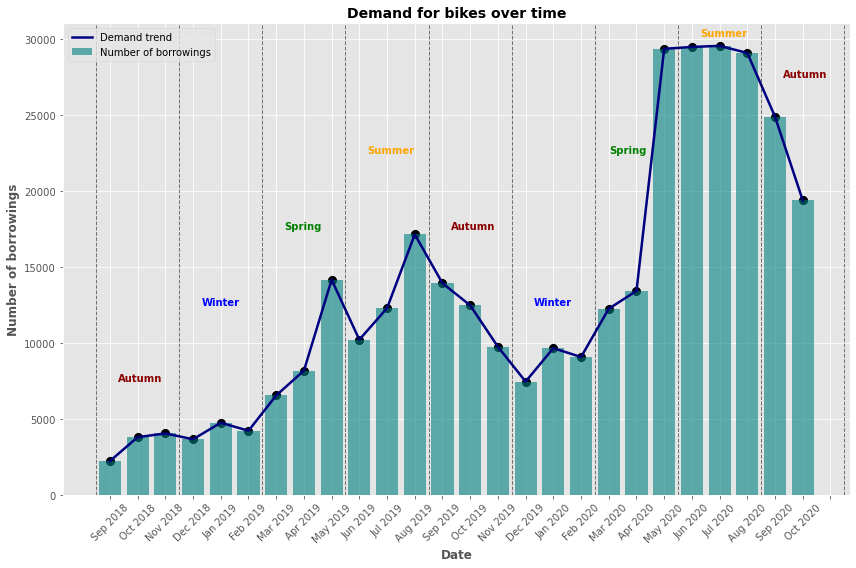

In [346]:
demand_fig = plot_demand(demand_grouped)

### 2. Fluctuations of demand for bikes
(identifikujte příčiny výkyvů poptávky)

According to the figure above, it is clear that the strongest factor that influences the demand for bikes and its fluctuations is the season of the year. The best months are those in summer - June, July and August, followed by spring months - March, April, May and autumn months - September, October and November.

Other possible factors, that might have an impact on the fluctuations of demand, are weather prevailing in a particular day and whether a certain day is a weekday or weekend.
These two factors will be analyzed in more detail in the next sections.

### 3. Week and weekend demand
půjčují si lidé kola více o víkendu než během pracovního týdne?

In [347]:
# make a copy of the demand dataframe
week_weekend = demand.copy(deep = True)

# check the dataframe
week_weekend.head()

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category,distance_km,distance_m,year,month
0,0,2018-09-15 08:52:05,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,St Andrew Square,North East corner,55.954728,-3.192653,20.0,short,0.938267,938.267462,2018,9
1,1,2018-09-15 09:24:33,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284,17.0,short,0.922255,922.255332,2018,9
2,2,2018-09-15 09:48:54,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116,58.0,medium,2.150913,2150.912698,2018,9
3,3,2018-09-16 12:01:36,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385,24.0,short,0.189646,189.646087,2018,9
4,4,2018-09-16 12:03:43,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,Kings Building 2,Sanderson Building,55.923202,-3.171646,8.0,very short,0.353751,353.751010,2018,9


In [348]:
# print the first data entry
print(week_weekend['started_at'].min())

# print the last data entry
print(week_weekend['started_at'].max())

2018-09-15 08:52:05
2020-10-30 23:51:25


In [349]:
# create a date range object according to previously retrieved dates to check the functionality dt accessor
# 0 - Monday, 1 - Tuesday, 2 - Wednesday, 3 - Thursday, 4 - Friday, 5 - Saturday, 6 - Sunday
dr = pd.date_range('2018-09-15', '2020-10-30', freq = 'D').to_series()
dr.dt.dayofweek.to_frame()

,0
2018-09-15,5
2018-09-16,6
2018-09-17,0
2018-09-18,1
2018-09-19,2
...,...
2020-10-26,0
2020-10-27,1
2020-10-28,2
2020-10-29,3


In [350]:
# create a series (dt accessor does not work on dataframes, only on series) to retrieve the day_of_week from
day_of_week_series = week_weekend['started_at']

# retrieve day_of_week and transform it into dataframe
day_of_week_frame = day_of_week_series.dt.weekday.to_frame()

# make a copy of the dataframe
week_weekend_days = week_weekend.copy(deep = True)

# add 'day_of_week' column with previously received values
week_weekend_days['day_of_week'] = day_of_week_frame

# check the dataframe
week_weekend_days

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,...,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category,distance_km,distance_m,year,month,day_of_week
0,0,2018-09-15 08:52:05,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,...,North East corner,55.954728,-3.192653,20.0,short,0.938267,938.267462,2018,9,5
1,1,2018-09-15 09:24:33,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,...,near Tesco's,55.962804,-3.196284,17.0,short,0.922255,922.255332,2018,9,5
2,2,2018-09-15 09:48:54,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,...,Entrance to Scottish Government Office,55.977638,-3.174116,58.0,medium,2.150913,2150.912698,2018,9,5
3,3,2018-09-16 12:01:36,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,...,Kings Building House,55.923479,-3.175385,24.0,short,0.189646,189.646087,2018,9,6
4,4,2018-09-16 12:03:43,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,...,Sanderson Building,55.923202,-3.171646,8.0,very short,0.353751,353.751010,2018,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340981,19374,2020-10-30 23:27:35,2020-10-30 23:38:40,665,1051,Warrender Park Road,On corner with Spottiswoode Street,55.938369,-3.198033,1051,...,On corner with Spottiswoode Street,55.938369,-3.198033,11.0,short,0.000000,0.000000,2020,10,4
340982,19375,2020-10-30 23:33:50,2020-10-30 23:40:02,372,1798,Chambers Street,Outside National Museum,55.947600,-3.188920,1814,...,Near Abbey Mount,55.955248,-3.172216,6.0,very short,1.343751,1343.750603,2020,10,4
340983,19376,2020-10-30 23:38:57,2020-10-30 23:43:33,275,1028,Hunter Square,In Hunter Square next to Tron Kirk,55.949798,-3.187795,1019,...,West end of Grassmarket,55.947097,-3.197246,5.0,very short,0.660810,660.810311,2020,10,4
340984,19377,2020-10-30 23:41:26,2020-10-30 23:50:44,557,358,Leith Walk,Leith Walk opposite Dalmeny Street,55.965040,-3.176686,259,...,North East corner,55.954906,-3.192444,9.0,very short,1.494380,1494.380045,2020,10,4


... day_of_week column with numerically encoded days successfuly added ...

In [351]:
# keep only date, exclude time
week_weekend_days['started_at'] = week_weekend['started_at'].dt.date

# make a copy for visualization
week_weekend_plot = week_weekend_days.copy(deep = True)

# group by day of week and calculate the counts of each day in the dataframe
week_weekend_days = week_weekend_days.groupby('day_of_week', as_index = False).count()

# check the dataframe
week_weekend_days

,day_of_week,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,...,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category,distance_km,distance_m,year,month
0,0,45088,45088,45088,45088,45088,45088,44713,45088,45088,...,45088,44667,45088,45088,45088,45088,45088,45088,45088,45088
1,1,45227,45227,45227,45227,45227,45227,44888,45227,45227,...,45227,44858,45227,45227,45227,45227,45227,45227,45227,45227
2,2,47168,47168,47168,47168,47168,47168,46772,47168,47168,...,47168,46735,47168,47168,47168,47168,47168,47168,47168,47168
3,3,49033,49033,49033,49033,49033,49033,48640,49033,49033,...,49033,48627,49033,49033,49033,49033,49033,49033,49033,49033
4,4,48667,48667,48667,48667,48667,48667,48231,48667,48667,...,48667,48203,48667,48667,48667,48667,48667,48667,48667,48667
5,5,54832,54832,54832,54832,54832,54832,54311,54832,54832,...,54832,54262,54832,54832,54832,54832,54832,54832,54832,54832
6,6,50965,50965,50965,50965,50965,50965,50581,50965,50965,...,50965,50533,50965,50965,50965,50965,50965,50965,50965,50965


... as it can be seen in the dataframe above, there are all seven days of the week (0-6) with the count of number of borrowings in each day ...

In [352]:
# create a new dataframe only with chosen columns
week_weekend_demand = pd.DataFrame()

# add chosen columns
week_weekend_demand['day_of_week'] = week_weekend_days['day_of_week']
week_weekend_demand['number_of_borrowings'] = week_weekend_days['index']

# define a function to convert numeric values of date into string values
def convert_day_of_week(x):
    if x == 0:
        return 'MONDAY'
    if x == 1:
        return 'TUESDAY'
    if x == 2:
        return 'WEDNESDAY'
    if x == 3:
        return 'THURSDAY'
    if x == 4:
        return 'FRIDAY'
    if x == 5:
        return 'SATURDAY'
    else:
        return 'SUNDAY'
    
# apply the function and create a new column with names of days
week_weekend_demand['day'] = week_weekend_demand['day_of_week'].apply(convert_day_of_week)

# check the dataframe
week_weekend_demand

,day_of_week,number_of_borrowings,day
0,0,45088,MONDAY
1,1,45227,TUESDAY
2,2,47168,WEDNESDAY
3,3,49033,THURSDAY
4,4,48667,FRIDAY
5,5,54832,SATURDAY
6,6,50965,SUNDAY


... newly created dataframe shows just the important information about bikes demand in each day - numerically encoded day, number of borrowings in each day and lexically expressed all names of each day ...

In [353]:
# apply the function and create a new column with names of days in this plot dataframe as well
week_weekend_plot['day'] = week_weekend_plot['day_of_week'].apply(convert_day_of_week)

In [354]:
# define plot function
def weekday_plot(df):
    fig = plt.figure(figsize = (12,8))
    plt.style.use('ggplot')
    ax = sns.countplot(data = df, x = 'day', alpha = 0.7,
                  palette = ['navy', 'darkred', 'teal', 'orange', 'blue', 'green', 'yellow'],
                  order = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY',
                           'FRIDAY', 'SATURDAY', 'SUNDAY'])
    
    plt.xlabel('Day of week', fontsize = 12, fontweight = 'semibold')
    plt.ylabel('Number of borrowings', fontsize = 12, fontweight = 'semibold')
    plt.title('Number of borrowings in diffrent weekdays', fontsize = 14,
              fontweight = 'semibold')
    
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()),
                    xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext = (0, 3), textcoords = "offset points",
                    ha = 'center', va = 'bottom', fontsize = 12,
                    fontweight = 'semibold')
    
    plt.grid(True)
    
    plt.show()
    return fig

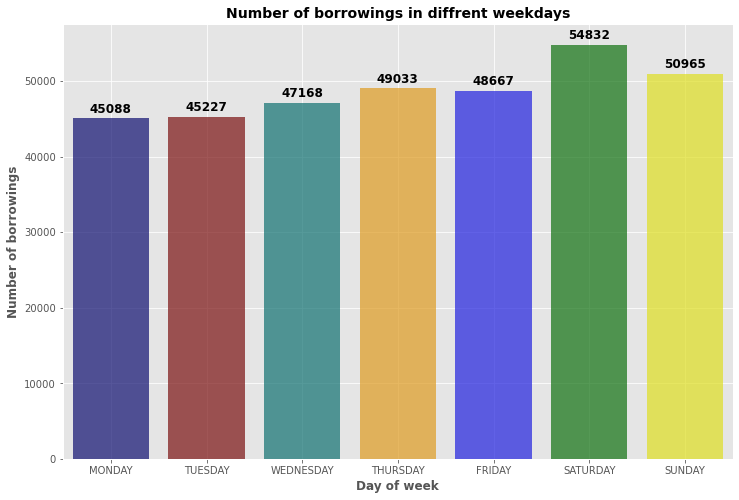

In [355]:
weekday_demand_fig = weekday_plot(week_weekend_plot)

According to the figure above, the hypothesis that there is a higher demand for bikes during weekend turned out to be true. The level of demand for bikes is the highest on Saturdays and Sundays. Let's find out the percentage of borrowings in each day ... 

In [356]:
# calculate the percentage of borrowings on Mondays
percentage_monday = len(week_weekend_plot[week_weekend_plot['day'] == 'MONDAY']) / len(week_weekend_plot) 

# calculate the percentage of borrowings on Tuesdays
percentage_tuesday = len(week_weekend_plot[week_weekend_plot['day'] == 'TUESDAY']) / len(week_weekend_plot)

# calculate the percentage of borrowings on Wednesdays
percentage_wednesday = len(week_weekend_plot[week_weekend_plot['day'] == 'WEDNESDAY']) / len(week_weekend_plot)

# calculate the percentage of borrowings on Thursdays
percentage_thursday = len(week_weekend_plot[week_weekend_plot['day'] == 'THURSDAY']) / len(week_weekend_plot)

# calculate the percentage of borrowings on Fridays
percentage_friday = len(week_weekend_plot[week_weekend_plot['day'] == 'FRIDAY']) / len(week_weekend_plot)

# calculate the percentage of borrowings on Saturdays
percentage_saturday = len(week_weekend_plot[week_weekend_plot['day'] == 'SATURDAY']) / len(week_weekend_plot)

# calculate the percentage of borrowings on Sundays
percentage_sunday = len(week_weekend_plot[week_weekend_plot['day'] == 'SUNDAY']) / len(week_weekend_plot)

# print the percentages
print('Borrowings on Mondays: {:.0%}'.format(percentage_monday))
print('Borrowings on Tuedays: {:.0%}'.format(percentage_tuesday))
print('Borrowings on Wednesdays: {:.0%}'.format(percentage_wednesday))
print('Borrowings on Thursdays: {:.0%}'.format(percentage_thursday))
print('Borrowings on Fridays: {:.0%}'.format(percentage_friday))
print('Borrowings on Saturdays: {:.0%}'.format(percentage_saturday))
print('Borrowings on Sundays: {:.0%}'.format(percentage_sunday))

Borrowings on Mondays: 13%
Borrowings on Tuedays: 13%
Borrowings on Wednesdays: 14%
Borrowings on Thursdays: 14%
Borrowings on Fridays: 14%
Borrowings on Saturdays: 16%
Borrowings on Sundays: 15%


As it is demonstratively shown in this section of demand analysis, people tend to borrow bikes mostly on weekends (especially on Saturdays), and therefore it is fair to conclude that a particular day of week has an impact on the height of demand in that day. In the following and final section of the demand parsing, there will be analyzed the impact of weather on the height of demand.

### 4. Impact of weather on the height of demand
(zjistěte vliv počasí na poptávku po kolech)

In [357]:
# check the weather dataframe
weather_initial.head()

,time,temp,feels,wind,gust,rain,humidity,cloud,pressure,vis,date
0,00:00,11 °c,11 °c,9 km/h from S,19 km/h,0.0 mm,79%,13%,1020 mb,Excellent,2018-09-01
1,03:00,13 °c,12 °c,11 km/h from SSW,19 km/h,0.0 mm,76%,96%,1020 mb,Excellent,2018-09-01
2,06:00,14 °c,13 °c,11 km/h from SSW,19 km/h,0.0 mm,84%,100%,1020 mb,Excellent,2018-09-01
3,09:00,14 °c,13 °c,14 km/h from SSW,23 km/h,0.1 mm,88%,78%,1021 mb,Excellent,2018-09-01
4,12:00,16 °c,16 °c,15 km/h from SSW,22 km/h,0.0 mm,87%,87%,1021 mb,Excellent,2018-09-01


In [358]:
weather_initial.vis.unique()

array(['Excellent', 'Poor', 'Good', 'Average'], dtype=object)

In [359]:
# create a new dataframe
weather = pd.DataFrame()

# add 'date' column
weather['date'] = weather_initial['date']

# clear the regex in the 'temp' column
weather['temp'] = weather_initial['temp'].str.replace('°c', '')

# clear the regex in the 'wind' column
weather['wind'] = weather_initial['wind'].str.slice(stop = 2)

# clear the regex in the 'gust' column
weather['gust'] = weather_initial['gust'].str.replace('km/h', '')

# clear the regex in the 'rain' column
weather['rain'] = weather_initial['rain'].str.replace('mm', '')

# clear the regex in the 'humidity' column
weather['humidity'] = weather_initial['humidity'].str.replace('%', '')

# clear the regex in the 'cloud' column
weather['cloud'] = weather_initial['cloud'].str.replace('%', '')

# clear the regex in the 'pressure' column
weather['pressure'] = weather_initial['pressure'].str.replace('mb', '')

# define encoding function
def encode_vis(x):
    if x == 'Excellent':
        return 0
    if x == 'Good':
        return 1
    if x == 'Average':
        return 2
    if x == 'Poor':
        return 3
    
# apply the function
weather['vis'] = weather_initial['vis'].apply(encode_vis)

In [360]:
# convert to float values
weather['temp'] = weather['temp'].astype('float64')
weather['wind'] = weather['wind'].astype('float64')
weather['gust'] = weather['gust'].astype('float64')
weather['rain'] = weather['rain'].astype('float64')
weather['humidity'] = weather['humidity'].astype('float64')
weather['cloud'] = weather['cloud'].astype('float64')
weather['pressure'] = weather['pressure'].astype('float64')

# check the dataframe
weather

,date,temp,wind,gust,rain,humidity,cloud,pressure,vis
0,2018-09-01,11.0,9.0,19.0,0.0,79.0,13.0,1020.0,0
1,2018-09-01,13.0,11.0,19.0,0.0,76.0,96.0,1020.0,0
2,2018-09-01,14.0,11.0,19.0,0.0,84.0,100.0,1020.0,0
3,2018-09-01,14.0,14.0,23.0,0.1,88.0,78.0,1021.0,0
4,2018-09-01,16.0,15.0,22.0,0.0,87.0,87.0,1021.0,0
...,...,...,...,...,...,...,...,...,...
6331,2020-10-31,14.0,21.0,33.0,0.4,86.0,100.0,993.0,3
6332,2020-10-31,14.0,24.0,37.0,0.4,88.0,94.0,987.0,3
6333,2020-10-31,10.0,42.0,55.0,0.5,75.0,100.0,989.0,0
6334,2020-10-31,9.0,38.0,54.0,0.0,76.0,79.0,994.0,0


In [361]:
# group by day and show average values on each day
weather_grouped = weather.groupby('date', as_index = False).mean()

# check the grouped dataframe
weather_grouped.tail(15)

,date,temp,wind,gust,rain,humidity,cloud,pressure,vis
777,2020-10-17,8.000,9.250,12.250,0.0000,82.000,79.375,1026.625,0.000
778,2020-10-18,8.250,5.125,7.625,0.1000,82.750,88.375,1022.250,1.125
779,2020-10-19,9.750,13.625,19.375,1.3000,88.750,94.250,1008.250,0.500
780,2020-10-20,11.500,7.875,11.500,0.8625,87.125,78.000,995.750,0.750
781,2020-10-21,11.875,7.750,11.875,0.0250,85.000,50.375,991.375,0.000
782,2020-10-22,9.625,11.250,15.875,0.0250,83.625,77.000,999.250,0.000
783,2020-10-23,7.500,14.375,21.125,0.2500,81.500,64.500,1000.625,0.000
784,2020-10-24,8.625,20.875,30.375,1.3000,80.750,62.000,990.125,0.625
785,2020-10-25,7.750,18.750,27.375,0.0000,78.375,36.250,984.375,0.000
786,2020-10-26,8.500,18.000,26.375,0.1625,83.750,67.375,986.500,0.000


In [362]:
# check the first and last data entry
print(weather_grouped['date'].min())
print(weather_grouped['date'].max())

2018-09-01
2020-10-31


In [363]:
# make a copy of the demand dataframe
weather_demand = demand.copy(deep = True)

# check the dataframe
weather_demand

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category,distance_km,distance_m,year,month
0,0,2018-09-15 08:52:05,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,St Andrew Square,North East corner,55.954728,-3.192653,20.0,short,0.938267,938.267462,2018,9
1,1,2018-09-15 09:24:33,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284,17.0,short,0.922255,922.255332,2018,9
2,2,2018-09-15 09:48:54,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116,58.0,medium,2.150913,2150.912698,2018,9
3,3,2018-09-16 12:01:36,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385,24.0,short,0.189646,189.646087,2018,9
4,4,2018-09-16 12:03:43,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,Kings Building 2,Sanderson Building,55.923202,-3.171646,8.0,very short,0.353751,353.751010,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340981,19374,2020-10-30 23:27:35,2020-10-30 23:38:40,665,1051,Warrender Park Road,On corner with Spottiswoode Street,55.938369,-3.198033,1051,Warrender Park Road,On corner with Spottiswoode Street,55.938369,-3.198033,11.0,short,0.000000,0.000000,2020,10
340982,19375,2020-10-30 23:33:50,2020-10-30 23:40:02,372,1798,Chambers Street,Outside National Museum,55.947600,-3.188920,1814,Abbeyhill,Near Abbey Mount,55.955248,-3.172216,6.0,very short,1.343751,1343.750603,2020,10
340983,19376,2020-10-30 23:38:57,2020-10-30 23:43:33,275,1028,Hunter Square,In Hunter Square next to Tron Kirk,55.949798,-3.187795,1019,Grassmarket,West end of Grassmarket,55.947097,-3.197246,5.0,very short,0.660810,660.810311,2020,10
340984,19377,2020-10-30 23:41:26,2020-10-30 23:50:44,557,358,Leith Walk,Leith Walk opposite Dalmeny Street,55.965040,-3.176686,259,St Andrew Square,North East corner,55.954906,-3.192444,9.0,very short,1.494380,1494.380045,2020,10


In [364]:
# exclude time, keep only date
weather_demand['started_at'] = weather_demand['started_at'].dt.date

# check the dataframe
weather_demand

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category,distance_km,distance_m,year,month
0,0,2018-09-15,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,St Andrew Square,North East corner,55.954728,-3.192653,20.0,short,0.938267,938.267462,2018,9
1,1,2018-09-15,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284,17.0,short,0.922255,922.255332,2018,9
2,2,2018-09-15,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116,58.0,medium,2.150913,2150.912698,2018,9
3,3,2018-09-16,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385,24.0,short,0.189646,189.646087,2018,9
4,4,2018-09-16,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,Kings Building 2,Sanderson Building,55.923202,-3.171646,8.0,very short,0.353751,353.751010,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340981,19374,2020-10-30,2020-10-30 23:38:40,665,1051,Warrender Park Road,On corner with Spottiswoode Street,55.938369,-3.198033,1051,Warrender Park Road,On corner with Spottiswoode Street,55.938369,-3.198033,11.0,short,0.000000,0.000000,2020,10
340982,19375,2020-10-30,2020-10-30 23:40:02,372,1798,Chambers Street,Outside National Museum,55.947600,-3.188920,1814,Abbeyhill,Near Abbey Mount,55.955248,-3.172216,6.0,very short,1.343751,1343.750603,2020,10
340983,19376,2020-10-30,2020-10-30 23:43:33,275,1028,Hunter Square,In Hunter Square next to Tron Kirk,55.949798,-3.187795,1019,Grassmarket,West end of Grassmarket,55.947097,-3.197246,5.0,very short,0.660810,660.810311,2020,10
340984,19377,2020-10-30,2020-10-30 23:50:44,557,358,Leith Walk,Leith Walk opposite Dalmeny Street,55.965040,-3.176686,259,St Andrew Square,North East corner,55.954906,-3.192444,9.0,very short,1.494380,1494.380045,2020,10


In [365]:
# group by date and count the number of borrowings on each date
weather_demand_grouped = weather_demand.groupby('started_at', as_index = False).count()

#check the dataframe
weather_demand_grouped

,started_at,index,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,duration_min,duration_category,distance_km,distance_m,year,month
0,2018-09-15,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,2018-09-16,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2,2018-09-17,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403
3,2018-09-18,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126
4,2018-09-19,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,2020-10-26,560,560,560,560,560,554,560,560,560,560,550,560,560,560,560,560,560,560,560
751,2020-10-27,437,437,437,437,437,434,437,437,437,437,436,437,437,437,437,437,437,437,437
752,2020-10-28,559,559,559,559,559,557,559,559,559,559,554,559,559,559,559,559,559,559,559
753,2020-10-29,478,478,478,478,478,475,478,478,478,478,474,478,478,478,478,478,478,478,478


In [366]:
# check the first and last data entry
print(weather_demand_grouped['started_at'].min())
print(weather_demand_grouped['started_at'].max())

2018-09-15
2020-10-30


In [367]:
# drop rows in weather dataframe with dates that are not in weather_demand dataframe
weather_grouped = weather_grouped.iloc[14:791]

# check the first and last data entry again
print(weather_grouped['date'].min())
print(weather_grouped['date'].max())

2018-09-15
2020-10-30


In [368]:
# create a new 'month' column in weather_grouped
weather_grouped['month'] = pd.DatetimeIndex(weather_grouped['date']).month

# create a new 'year' column in weather_grouped
weather_grouped['year'] = pd.DatetimeIndex(weather_grouped['date']).year

# check the dataframe
weather_grouped.head()

,date,temp,wind,gust,rain,humidity,cloud,pressure,vis,month,year
14,2018-09-15,10.500,14.875,23.500,0.1250,83.875,58.125,1017.375,0.000,9,2018
15,2018-09-16,12.875,26.500,43.125,0.1250,81.500,79.500,1008.875,0.000,9,2018
16,2018-09-17,13.875,18.000,29.875,0.0250,83.000,66.125,1006.375,0.000,9,2018
17,2018-09-18,14.125,16.875,28.500,0.2375,86.875,57.750,996.125,0.000,9,2018
18,2018-09-19,11.750,34.750,55.625,0.3625,75.750,52.250,995.875,0.125,9,2018


In [369]:
# create a new 'month' column in weather_demand_grouped as well
weather_demand_grouped['month'] = pd.DatetimeIndex(weather_demand_grouped['started_at']).month

# create a new 'year' column in weather_demand_grouped as well
weather_demand_grouped['year'] = pd.DatetimeIndex(weather_demand_grouped['started_at']).year

# keep only necessary columns
weather_demand_grouped.drop(columns = ['ended_at', 'duration', 'start_station_id', 'start_station_name', 'start_station_description',
                             'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name',
                             'end_station_description', 'end_station_latitude', 'end_station_longitude', 'duration_min',
                             'duration_category', 'distance_km', 'distance_m'], inplace = True)

# check the dataframe
weather_demand_grouped.head()

,started_at,index,year,month
0,2018-09-15,3,2018,9
1,2018-09-16,10,2018,9
2,2018-09-17,403,2018,9
3,2018-09-18,126,2018,9
4,2018-09-19,77,2018,9


In [370]:
# divide both datasets into years
weather_2018 = weather_grouped[weather_grouped['year'] == 2018]
weather_2019 = weather_grouped[weather_grouped['year'] == 2019]
weather_2020 = weather_grouped[weather_grouped['year'] == 2020]

demand_2018 = weather_demand_grouped[weather_demand_grouped['year'] == 2018]
demand_2019 = weather_demand_grouped[weather_demand_grouped['year'] == 2019]
demand_2020 = weather_demand_grouped[weather_demand_grouped['year'] == 2020]

In [371]:
# divide both datasets into months
weather_2018_sep = weather_2018[weather_2018['month'] == 9]
weather_2018_oct = weather_2018[weather_2018['month'] == 10]
weather_2018_nov = weather_2018[weather_2018['month'] == 11]
weather_2018_dec = weather_2018[weather_2018['month'] == 12]

weather_2019_jan = weather_2019[weather_2019['month'] == 1]
weather_2019_feb = weather_2019[weather_2019['month'] == 2]
weather_2019_mar = weather_2019[weather_2019['month'] == 3]
weather_2019_apr = weather_2019[weather_2019['month'] == 4]
weather_2019_may = weather_2019[weather_2019['month'] == 5]
weather_2019_jun = weather_2019[weather_2019['month'] == 6]
weather_2019_jul = weather_2019[weather_2019['month'] == 7]
weather_2019_aug = weather_2019[weather_2019['month'] == 8]
weather_2019_sep = weather_2019[weather_2019['month'] == 9]
weather_2019_oct = weather_2019[weather_2019['month'] == 10]
weather_2019_nov = weather_2019[weather_2019['month'] == 11]
weather_2019_dec = weather_2019[weather_2019['month'] == 12]

weather_2020_jan = weather_2020[weather_2020['month'] == 1]
weather_2020_feb = weather_2020[weather_2020['month'] == 2]
weather_2020_mar = weather_2020[weather_2020['month'] == 3]
weather_2020_apr = weather_2020[weather_2020['month'] == 4]
weather_2020_may = weather_2020[weather_2020['month'] == 5]
weather_2020_jun = weather_2020[weather_2020['month'] == 6]
weather_2020_jul = weather_2020[weather_2020['month'] == 7]
weather_2020_aug = weather_2020[weather_2020['month'] == 8]
weather_2020_sep = weather_2020[weather_2020['month'] == 9]
weather_2020_oct = weather_2020[weather_2020['month'] == 10]

demand_2018_sep = demand_2018[demand_2018['month'] == 9]
demand_2018_oct = demand_2018[demand_2018['month'] == 10]
demand_2018_nov = demand_2018[demand_2018['month'] == 11]
demand_2018_dec = demand_2018[demand_2018['month'] == 12]

demand_2019_jan = demand_2019[demand_2019['month'] == 1]
demand_2019_feb = demand_2019[demand_2019['month'] == 2]
demand_2019_mar = demand_2019[demand_2019['month'] == 3]
demand_2019_apr = demand_2019[demand_2019['month'] == 4]
demand_2019_may = demand_2019[demand_2019['month'] == 5]
demand_2019_jun = demand_2019[demand_2019['month'] == 6]
demand_2019_jul = demand_2019[demand_2019['month'] == 7]
demand_2019_aug = demand_2019[demand_2019['month'] == 8]
demand_2019_sep = demand_2019[demand_2019['month'] == 9]
demand_2019_oct = demand_2019[demand_2019['month'] == 10]
demand_2019_nov = demand_2019[demand_2019['month'] == 11]
demand_2019_dec = demand_2019[demand_2019['month'] == 12]

demand_2020_jan = demand_2020[demand_2020['month'] == 1]
demand_2020_feb = demand_2020[demand_2020['month'] == 2]
demand_2020_mar = demand_2020[demand_2020['month'] == 3]
demand_2020_apr = demand_2020[demand_2020['month'] == 4]
demand_2020_may = demand_2020[demand_2020['month'] == 5]
demand_2020_jun = demand_2020[demand_2020['month'] == 6]
demand_2020_jul = demand_2020[demand_2020['month'] == 7]
demand_2020_aug = demand_2020[demand_2020['month'] == 8]
demand_2020_sep = demand_2020[demand_2020['month'] == 9]
demand_2020_oct = demand_2020[demand_2020['month'] == 10]

In [372]:
# define plot function
def weather_demand_plot(df_demand, df_weather):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20, 12))
    plt.style.use('ggplot')
    
    ax1.bar(x = np.arange(0, len(df_demand)), height = df_demand['index'],
            color = 'teal', alpha = 0.6, label = 'Number of borrowings')
    sns.lineplot(data = df_demand, x = np.arange(0, len(df_demand)), y = 'index', lw = 2.5, color = 'black',
                 label = 'Demand trend', ax = ax1)
    sns.lineplot(data = df_demand, x = np.arange(0, len(df_demand)), y = 'index', lw = 10, color = 'black',
                 alpha = 0.2, ax = ax1)
    sns.lineplot(data = df_weather, x = np.arange(0, len(df_weather)),
                 y = 'rain', lw = 2.5, label = 'Rain', ax = ax3, color = 'navy')
    sns.lineplot(data = df_weather, x = np.arange(0, len(df_weather)),
                 y = 'rain', lw = 10, alpha = 0.2, ax = ax3, color = 'navy')
    sns.lineplot(data = df_weather, x = np.arange(0, len(df_weather)),
                 y = 'temp', lw = 2.5, label = 'Temperature', ax = ax3, color = 'darkred')
    sns.lineplot(data = df_weather, x = np.arange(0, len(df_weather)),
                 y = 'temp', lw = 10, ax = ax3, color = 'darkred', alpha = 0.2)
    sns.scatterplot(data = df_weather, x = np.arange(0, len(df_weather)), y = 'rain', s = 100, color = 'black', ax = ax3)
    sns.scatterplot(data = df_weather, x = np.arange(0, len(df_weather)), y = 'temp', s = 100, color = 'black', ax = ax3)
    sns.scatterplot(data = df_demand, x = np.arange(0, len(df_demand)), y = 'index', s = 100, color = 'black', ax = ax1)
    ax2.scatter(x = df_weather['rain'], y = df_demand['index'], s = 50, color = 'slateblue', marker = 'x')
    ax4.scatter(x = df_weather['temp'], y = df_demand['index'], s = 50, color = 'darkorange', marker = '+')
    ax2.scatter(x = df_weather['rain'], y = df_demand['index'], s = 150, alpha = 0.2, color = 'slateblue', marker = 'o')
    ax4.scatter(x = df_weather['temp'], y = df_demand['index'], s = 150, alpha = 0.2, color = 'darkorange', marker = 'o')
    
    z = [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
    w = [200, 300, 400, 500, 600, 700, 800, 900]
    ax2.plot(z, w, color = 'black', lw = 150, alpha = 0.2)
    
    ax1.set_xticks(np.arange(0, len(df_demand) + 1, 1))
    ax3.set_xticks(np.arange(0, len(df_demand) + 1, 1))
    
    ax1.set_xlabel('Day of the month', fontsize = 12, fontweight = 'semibold')
    ax1.set_ylabel('Number of borrowings', fontsize = 12, fontweight = 'semibold')
    ax1.set_yticks([])
    
    ax2.set_xlabel('Rain (in mm)', fontsize = 12, fontweight = 'semibold')
    ax2.set_ylabel('Number of borrowings', fontsize = 12, fontweight = 'semibold')
    
    ax3.set_xlabel('Day of the month', fontsize = 12, fontweight = 'semibold')
    ax3.set_ylabel('Temperature, rain', fontsize = 12, fontweight = 'semibold')
    ax3.set_yticks([])
    
    ax4.set_xlabel('Temperature (in °C)', fontsize = 12, fontweight = 'semibold')
    ax4.set_ylabel('Number of borrowings', fontsize = 12, fontweight = 'semibold')
    
    plt.tight_layout()
    plt.legend()
    
    plt.show()
    return fig

No handles with labels found to put in legend.


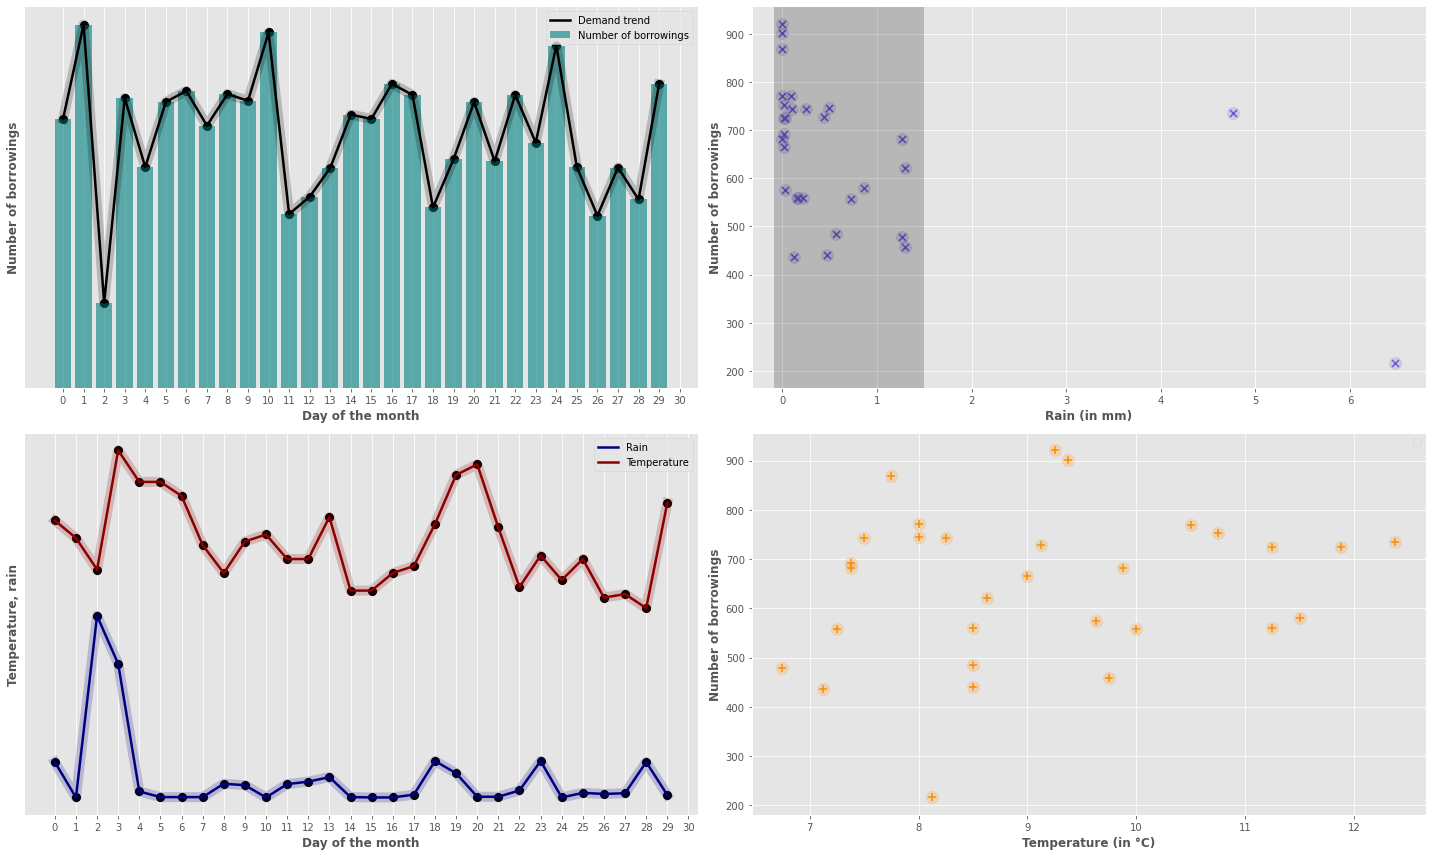

In [373]:
october_2020_fig = weather_demand_plot(demand_2020_oct, weather_2020_oct)

As it can be seen in the figure above, the demand for bikes depends mainly on rain. This can be observed on the left-hand side of the figure when we look at Demand trend - almost every substantial decrease in demand (upper part) is simultaneous with an increase in rain (lower part). It can be even better seen on the right-hand side, in case of high volume of rain, there is a substantially lower amount of borrowings.

In the case of temperetaure, there seems to be almost no correlation with demand trend, which can be seen mainly on the right-hand side of the figure, where all points appear to be randomly scattered all over the graph. However, this might not hold true in winter months, when the temperatures are dramatically lower than during the rest of the year.